# Data Scientist Technical Assessment

### Background Information

The United States Census Bureau leads the country’s Federal Statistical System; its primary responsibility is to collect demographic and economic data about America to help inform strategic initiatives. Every ten years, the census is conducted to collect and organize information regarding the US population to effectively allocate billions of dollars of funding to various endeavors (e.g., the building and maintenance of hospitals, schools, fire departments, transportation infrastructure, etc.). Additionally, the collection of census information helps to examine the demographic characteristics of subpopulations across the country.

### The Data

I have been provided a sample dataset from the US Census archive containing detailed but anonymized information for ~300,000 individuals. This archive contains three files:

1. census_income_learn.csv (data for model training).
2. census_income_test.csv (data for model testing).
3. census_income_metadata.txt (metadata for both datasets).


### Problem Statement

For this technical assessment, I  have been tasked with identifying characteristics that are associated with a person making more or less than $50,000 per year; 
the target variable for my research question is the final column of the datasets.
 

Considerations for my data analysis should include, but are not limited to, the following:

- Exploratory Data Analysis: Numerical and/or graphical representations of the data that may help inform insights and/or tactics for answering the research question of interest.  

- Data Preparation: Data cleaning, preprocessing, feature engineering, etc., that may aid in improving data clarity & model generation. 

- Data Modeling: The building of a few competing models to predict the target variable. 

- Model Assessment: A selection of the best model based on performance comparisons.

- Results: A concise summary of key findings, recommendations, & future improvements.

# Exploratory Data Analysis (EDA) & Data Preparation 


## Import libraries 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

#sklearn imports
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
from sklearn.pipeline import Pipeline



## Load Data

In [2]:
# Load the data with the first row as column names
train_file_path = './census_income_learn.csv'
test_file_path = './census_income_test.csv'

## Checking Train Data

In [3]:
# Load training data
train_data = pd.read_csv(train_file_path, header=None)

# Look at the shape of the data
print('Train shape:', train_data.shape)
# Print train columns
print('Train columns:', train_data.columns.tolist())
# Print the head of the loaded data
print("Training data:")
train_data.head()

Train shape: (199523, 42)
Train columns: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41]
Training data:


,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,73,Not in universe,0,0,High school graduate,0,Not in universe,Widowed,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95,- 50000.
1,58,Self-employed-not incorporated,4,34,Some college but no degree,0,Not in universe,Divorced,Construction,Precision production craft & repair,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,- 50000.
2,18,Not in universe,0,0,10th grade,0,High school,Never married,Not in universe or children,Not in universe,...,Vietnam,Vietnam,Vietnam,Foreign born- Not a citizen of U S,0,Not in universe,2,0,95,- 50000.
3,9,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.
4,10,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.


## Checking Test Data

In [4]:
# Load testing data 
test_data = pd.read_csv(test_file_path, header=None) 

# Look at the shape of the data
print('Test shape:', test_data.shape)
# Print test columns
print('Test columns:', test_data.columns.tolist())
print("\nTesting data:")
test_data.head()

Test shape: (99762, 42)
Test columns: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41]

Testing data:


,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,38,Private,6,36,1st 2nd 3rd or 4th grade,0,Not in universe,Married-civilian spouse present,Manufacturing-durable goods,Machine operators assmblrs & inspctrs,...,Mexico,Mexico,Mexico,Foreign born- Not a citizen of U S,0,Not in universe,2,12,95,- 50000.
1,44,Self-employed-not incorporated,37,12,Associates degree-occup /vocational,0,Not in universe,Married-civilian spouse present,Business and repair services,Professional specialty,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,26,95,- 50000.
2,2,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,95,- 50000.
3,35,Private,29,3,High school graduate,0,Not in universe,Divorced,Transportation,Executive admin and managerial,...,United-States,United-States,United-States,Native- Born in the United States,2,Not in universe,2,52,94,- 50000.
4,49,Private,4,34,High school graduate,0,Not in universe,Divorced,Construction,Precision production craft & repair,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,50,95,- 50000.


As we can see, there is no proper names of our columns, so we need to replace it. I will create a dictionary with the names nd after would replace these names into our train and test dataset 


In [5]:
def name_categories(train_data, test_data):
    # Add the column names for each column
    column_names_dict = {
        0: 'age',
        1: 'class_of_worker',
        2: 'detailed_industry_recode',
        3: 'detailed_occupation_recode',
        4: 'education',
        5: 'wage_per_hour',
        6: 'enroll_in_edu_inst_last_wk',
        7: 'marital_stat',
        8: 'major_industry_code',
        9: 'major_occupation_code',
        10: 'race',
        11: 'hispanic_origin',
        12: 'sex',
        13: 'member_of_a_labor_union',
        14: 'reason_for_unemployment',
        15: 'full_or_part_time_employment_stat',
        16: 'capital_gains',
        17: 'capital_losses',
        18: 'dividends_from_stocks',
        19: 'federal_income_tax_liability',
        20: 'tax_filer_stat',
        21: 'region_of_previous_residence',
        22: 'state_of_previous_residence',
        23: 'detailed_household_and_family_stat',
        24: 'detailed_household_summary_in_household',
        25: 'migration_code_change_in_msa',
        26: 'migration_code_change_in_reg',
        27: 'migration_code_move_within_reg',
        28: 'live_in_this_house_1_year_ago',
        29: 'migration_prev_res_in_sunbelt',
        30: 'num_persons_worked_for_employer',
        31: 'family_members_under_18',
        32: 'country_of_birth_father',
        33: 'country_of_birth_mother',
        34: 'country_of_birth_self',
        35: 'citizenship',
        36: 'own_business_or_self_employed',
        37: "fill_inc_questionnaire_for_veteran's_admin",
        38: 'veterans_benefits',
        39: 'weeks_worked_in_year',
        40: 'year',
        41: 'income'
    }
    temp_train = train_data.rename(columns=column_names_dict)
    temp_test = test_data.rename(columns=column_names_dict)

    return temp_train, temp_test

# Append the function
train_renamed, test_renamed = name_categories(train_data, test_data)



## Checking Train Data after renaming columns 

In [6]:
pd.set_option('display.max_columns', None)

# Print train columns
print('Train columns:', train_renamed.columns.tolist())
print()

# Read the head of train and test datasets
print("Train dataset head:")
train_renamed.head()

Train columns: ['age', 'class_of_worker', 'detailed_industry_recode', 'detailed_occupation_recode', 'education', 'wage_per_hour', 'enroll_in_edu_inst_last_wk', 'marital_stat', 'major_industry_code', 'major_occupation_code', 'race', 'hispanic_origin', 'sex', 'member_of_a_labor_union', 'reason_for_unemployment', 'full_or_part_time_employment_stat', 'capital_gains', 'capital_losses', 'dividends_from_stocks', 'federal_income_tax_liability', 'tax_filer_stat', 'region_of_previous_residence', 'state_of_previous_residence', 'detailed_household_and_family_stat', 'detailed_household_summary_in_household', 'migration_code_change_in_msa', 'migration_code_change_in_reg', 'migration_code_move_within_reg', 'live_in_this_house_1_year_ago', 'migration_prev_res_in_sunbelt', 'num_persons_worked_for_employer', 'family_members_under_18', 'country_of_birth_father', 'country_of_birth_mother', 'country_of_birth_self', 'citizenship', 'own_business_or_self_employed', "fill_inc_questionnaire_for_veteran's_admin"

,age,class_of_worker,detailed_industry_recode,detailed_occupation_recode,education,wage_per_hour,enroll_in_edu_inst_last_wk,marital_stat,major_industry_code,major_occupation_code,race,hispanic_origin,sex,member_of_a_labor_union,reason_for_unemployment,full_or_part_time_employment_stat,capital_gains,capital_losses,dividends_from_stocks,federal_income_tax_liability,tax_filer_stat,region_of_previous_residence,state_of_previous_residence,detailed_household_and_family_stat,detailed_household_summary_in_household,migration_code_change_in_msa,migration_code_change_in_reg,migration_code_move_within_reg,live_in_this_house_1_year_ago,migration_prev_res_in_sunbelt,num_persons_worked_for_employer,family_members_under_18,country_of_birth_father,country_of_birth_mother,country_of_birth_self,citizenship,own_business_or_self_employed,fill_inc_questionnaire_for_veteran's_admin,veterans_benefits,weeks_worked_in_year,year,income
0,73,Not in universe,0,0,High school graduate,0,Not in universe,Widowed,Not in universe or children,Not in universe,White,All other,Female,Not in universe,Not in universe,Not in labor force,0,0,0,Nonfiler,Not in universe,Not in universe,Other Rel 18+ ever marr not in subfamily,Other relative of householder,1700.09,?,?,?,Not in universe under 1 year old,?,0,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95,- 50000.
1,58,Self-employed-not incorporated,4,34,Some college but no degree,0,Not in universe,Divorced,Construction,Precision production craft & repair,White,All other,Male,Not in universe,Not in universe,Children or Armed Forces,0,0,0,Head of household,South,Arkansas,Householder,Householder,1053.55,MSA to MSA,Same county,Same county,No,Yes,1,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,- 50000.
2,18,Not in universe,0,0,10th grade,0,High school,Never married,Not in universe or children,Not in universe,Asian or Pacific Islander,All other,Female,Not in universe,Not in universe,Not in labor force,0,0,0,Nonfiler,Not in universe,Not in universe,Child 18+ never marr Not in a subfamily,Child 18 or older,991.95,?,?,?,Not in universe under 1 year old,?,0,Not in universe,Vietnam,Vietnam,Vietnam,Foreign born- Not a citizen of U S,0,Not in universe,2,0,95,- 50000.
3,9,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,White,All other,Female,Not in universe,Not in universe,Children or Armed Forces,0,0,0,Nonfiler,Not in universe,Not in universe,Child <18 never marr not in subfamily,Child under 18 never married,1758.14,Nonmover,Nonmover,Nonmover,Yes,Not in universe,0,Both parents present,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.
4,10,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,White,All other,Female,Not in universe,Not in universe,Children or Armed Forces,0,0,0,Nonfiler,Not in universe,Not in universe,Child <18 never marr not in subfamily,Child under 18 never married,1069.16,Nonmover,Nonmover,Nonmover,Yes,Not in universe,0,Both parents present,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.


In [7]:
train_renamed.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199523 entries, 0 to 199522
Data columns (total 42 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   age                                         199523 non-null  int64  
 1   class_of_worker                             199523 non-null  object 
 2   detailed_industry_recode                    199523 non-null  int64  
 3   detailed_occupation_recode                  199523 non-null  int64  
 4   education                                   199523 non-null  object 
 5   wage_per_hour                               199523 non-null  int64  
 6   enroll_in_edu_inst_last_wk                  199523 non-null  object 
 7   marital_stat                                199523 non-null  object 
 8   major_industry_code                         199523 non-null  object 
 9   major_occupation_code                       199523 non-null  object 
 

In [8]:
train_renamed.describe()

,age,detailed_industry_recode,detailed_occupation_recode,wage_per_hour,capital_gains,capital_losses,dividends_from_stocks,detailed_household_summary_in_household,num_persons_worked_for_employer,own_business_or_self_employed,veterans_benefits,weeks_worked_in_year,year
count,199523.000000,199523.000000,199523.000000,199523.000000,199523.00000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000
mean,34.494199,15.352320,11.306556,55.426908,434.71899,37.313788,197.529533,1740.380269,1.956180,0.175438,1.514833,23.174897,94.499672
std,22.310895,18.067129,14.454204,274.896454,4697.53128,271.896428,1984.163658,993.768156,2.365126,0.553694,0.851473,24.411488,0.500001
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,37.870000,0.000000,0.000000,0.000000,0.000000,94.000000
25%,15.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1061.615000,0.000000,0.000000,2.000000,0.000000,94.000000
50%,33.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1618.310000,1.000000,0.000000,2.000000,8.000000,94.000000
75%,50.000000,33.000000,26.000000,0.000000,0.00000,0.000000,0.000000,2188.610000,4.000000,0.000000,2.000000,52.000000,95.000000
max,90.000000,51.000000,46.000000,9999.000000,99999.00000,4608.000000,99999.000000,18656.300000,6.000000,2.000000,2.000000,52.000000,95.000000


## Checking Test Data after renaming columns 

In [9]:
# Print test columns
print('Test columns:', test_renamed.columns.tolist())
print()
print("\nTest dataset head:")
test_renamed.head()

Test columns: ['age', 'class_of_worker', 'detailed_industry_recode', 'detailed_occupation_recode', 'education', 'wage_per_hour', 'enroll_in_edu_inst_last_wk', 'marital_stat', 'major_industry_code', 'major_occupation_code', 'race', 'hispanic_origin', 'sex', 'member_of_a_labor_union', 'reason_for_unemployment', 'full_or_part_time_employment_stat', 'capital_gains', 'capital_losses', 'dividends_from_stocks', 'federal_income_tax_liability', 'tax_filer_stat', 'region_of_previous_residence', 'state_of_previous_residence', 'detailed_household_and_family_stat', 'detailed_household_summary_in_household', 'migration_code_change_in_msa', 'migration_code_change_in_reg', 'migration_code_move_within_reg', 'live_in_this_house_1_year_ago', 'migration_prev_res_in_sunbelt', 'num_persons_worked_for_employer', 'family_members_under_18', 'country_of_birth_father', 'country_of_birth_mother', 'country_of_birth_self', 'citizenship', 'own_business_or_self_employed', "fill_inc_questionnaire_for_veteran's_admin",

,age,class_of_worker,detailed_industry_recode,detailed_occupation_recode,education,wage_per_hour,enroll_in_edu_inst_last_wk,marital_stat,major_industry_code,major_occupation_code,race,hispanic_origin,sex,member_of_a_labor_union,reason_for_unemployment,full_or_part_time_employment_stat,capital_gains,capital_losses,dividends_from_stocks,federal_income_tax_liability,tax_filer_stat,region_of_previous_residence,state_of_previous_residence,detailed_household_and_family_stat,detailed_household_summary_in_household,migration_code_change_in_msa,migration_code_change_in_reg,migration_code_move_within_reg,live_in_this_house_1_year_ago,migration_prev_res_in_sunbelt,num_persons_worked_for_employer,family_members_under_18,country_of_birth_father,country_of_birth_mother,country_of_birth_self,citizenship,own_business_or_self_employed,fill_inc_questionnaire_for_veteran's_admin,veterans_benefits,weeks_worked_in_year,year,income
0,38,Private,6,36,1st 2nd 3rd or 4th grade,0,Not in universe,Married-civilian spouse present,Manufacturing-durable goods,Machine operators assmblrs & inspctrs,White,Mexican (Mexicano),Female,Not in universe,Not in universe,Full-time schedules,0,0,0,Joint one under 65 & one 65+,Not in universe,Not in universe,Spouse of householder,Spouse of householder,1032.38,?,?,?,Not in universe under 1 year old,?,4,Not in universe,Mexico,Mexico,Mexico,Foreign born- Not a citizen of U S,0,Not in universe,2,12,95,- 50000.
1,44,Self-employed-not incorporated,37,12,Associates degree-occup /vocational,0,Not in universe,Married-civilian spouse present,Business and repair services,Professional specialty,White,All other,Female,Not in universe,Not in universe,PT for econ reasons usually PT,0,0,2500,Joint both under 65,Not in universe,Not in universe,Spouse of householder,Spouse of householder,1462.33,?,?,?,Not in universe under 1 year old,?,1,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,26,95,- 50000.
2,2,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,White,Mexican-American,Male,Not in universe,Not in universe,Children or Armed Forces,0,0,0,Nonfiler,Not in universe,Not in universe,Child <18 never marr not in subfamily,Child under 18 never married,1601.75,?,?,?,Not in universe under 1 year old,?,0,Both parents present,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,95,- 50000.
3,35,Private,29,3,High school graduate,0,Not in universe,Divorced,Transportation,Executive admin and managerial,White,All other,Female,Not in universe,Not in universe,Children or Armed Forces,0,0,0,Head of household,Not in universe,Not in universe,Householder,Householder,1866.88,Nonmover,Nonmover,Nonmover,Yes,Not in universe,5,Not in universe,United-States,United-States,United-States,Native- Born in the United States,2,Not in universe,2,52,94,- 50000.
4,49,Private,4,34,High school graduate,0,Not in universe,Divorced,Construction,Precision production craft & repair,White,All other,Male,Not in universe,Not in universe,Full-time schedules,0,0,0,Single,Not in universe,Not in universe,Secondary individual,Nonrelative of householder,1394.54,?,?,?,Not in universe under 1 year old,?,4,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,50,95,- 50000.


In [10]:
test_renamed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99762 entries, 0 to 99761
Data columns (total 42 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   age                                         99762 non-null  int64  
 1   class_of_worker                             99762 non-null  object 
 2   detailed_industry_recode                    99762 non-null  int64  
 3   detailed_occupation_recode                  99762 non-null  int64  
 4   education                                   99762 non-null  object 
 5   wage_per_hour                               99762 non-null  int64  
 6   enroll_in_edu_inst_last_wk                  99762 non-null  object 
 7   marital_stat                                99762 non-null  object 
 8   major_industry_code                         99762 non-null  object 
 9   major_occupation_code                       99762 non-null  object 
 10  race      

In [11]:
test_renamed.describe()

,age,detailed_industry_recode,detailed_occupation_recode,wage_per_hour,capital_gains,capital_losses,dividends_from_stocks,detailed_household_summary_in_household,num_persons_worked_for_employer,own_business_or_self_employed,veterans_benefits,weeks_worked_in_year,year
count,99762.000000,99762.000000,99762.000000,99762.000000,99762.000000,99762.000000,99762.000000,99762.000000,99762.000000,99762.000000,99762.000000,99762.000000,99762.000000
mean,34.628596,15.332812,11.331118,54.461268,425.788577,35.919458,192.494727,1739.542838,1.956156,0.178505,1.519827,23.185331,94.500652
std,22.333449,18.026709,14.459589,270.202643,4616.795578,265.525252,1841.728492,994.900902,2.364331,0.558316,0.848229,24.389184,0.500002
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,43.260000,0.000000,0.000000,0.000000,0.000000,94.000000
25%,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1058.050000,0.000000,0.000000,2.000000,0.000000,94.000000
50%,33.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1615.395000,1.000000,0.000000,2.000000,8.000000,95.000000
75%,50.000000,33.000000,26.000000,0.000000,0.000000,0.000000,0.000000,2187.277500,4.000000,0.000000,2.000000,52.000000,95.000000
max,90.000000,51.000000,46.000000,9900.000000,99999.000000,4608.000000,99999.000000,16258.200000,6.000000,2.000000,2.000000,52.000000,95.000000


## Dtypes before transformation

In [12]:
train_renamed.dtypes

age                                             int64
class_of_worker                                object
detailed_industry_recode                        int64
detailed_occupation_recode                      int64
education                                      object
wage_per_hour                                   int64
enroll_in_edu_inst_last_wk                     object
marital_stat                                   object
major_industry_code                            object
major_occupation_code                          object
race                                           object
hispanic_origin                                object
sex                                            object
member_of_a_labor_union                        object
reason_for_unemployment                        object
full_or_part_time_employment_stat              object
capital_gains                                   int64
capital_losses                                  int64
dividends_from_stocks       

In [13]:
test_renamed.dtypes

age                                             int64
class_of_worker                                object
detailed_industry_recode                        int64
detailed_occupation_recode                      int64
education                                      object
wage_per_hour                                   int64
enroll_in_edu_inst_last_wk                     object
marital_stat                                   object
major_industry_code                            object
major_occupation_code                          object
race                                           object
hispanic_origin                                object
sex                                            object
member_of_a_labor_union                        object
reason_for_unemployment                        object
full_or_part_time_employment_stat              object
capital_gains                                   int64
capital_losses                                  int64
dividends_from_stocks       

I would need to change some columns in the train and test datasets to be able to work with them and make some visualizations. 

In [14]:
# First I need to transform our target: income to have 1 if more than 50k and 0 if less than 50k
import numpy as np 
# map income to 0 - 1
map_income = {
    ' - 50000.': 0,
    ' 50000+.': 1}

train_renamed["income"] = [map_income[value] for value in train_renamed.income]
train_renamed["income"] = train_renamed["income"].astype('category')

test_renamed["income"] = [map_income[value] for value in test_renamed.income]
test_renamed["income"] = test_renamed["income"].astype('category')


# After I will transform some important columns from objects or int into category:

columns_to_transfer = ["detailed_industry_recode","detailed_occupation_recode","own_business_or_self_employed","veterans_benefits", "year"]

train_renamed[columns_to_transfer] = train_renamed[columns_to_transfer].astype('category')
test_renamed[columns_to_transfer] = test_renamed[columns_to_transfer].astype('category')


## Dtypes after transformations 

In [15]:
train_renamed.dtypes

age                                              int64
class_of_worker                                 object
detailed_industry_recode                      category
detailed_occupation_recode                    category
education                                       object
wage_per_hour                                    int64
enroll_in_edu_inst_last_wk                      object
marital_stat                                    object
major_industry_code                             object
major_occupation_code                           object
race                                            object
hispanic_origin                                 object
sex                                             object
member_of_a_labor_union                         object
reason_for_unemployment                         object
full_or_part_time_employment_stat               object
capital_gains                                    int64
capital_losses                                   int64
dividends_

In [16]:
test_renamed.dtypes

age                                              int64
class_of_worker                                 object
detailed_industry_recode                      category
detailed_occupation_recode                    category
education                                       object
wage_per_hour                                    int64
enroll_in_edu_inst_last_wk                      object
marital_stat                                    object
major_industry_code                             object
major_occupation_code                           object
race                                            object
hispanic_origin                                 object
sex                                             object
member_of_a_labor_union                         object
reason_for_unemployment                         object
full_or_part_time_employment_stat               object
capital_gains                                    int64
capital_losses                                   int64
dividends_

In [17]:
train_renamed.income.value_counts()

income
0    187141
1     12382
Name: count, dtype: int64

In [18]:
test_renamed.income.value_counts()

income
0    93576
1     6186
Name: count, dtype: int64

### Checking duplicates

In [19]:
# Checking how many duplicates do I have before cleaning data
print("Do we have duplicates in our train dataset ? ")
train_renamed.duplicated().any()

Do we have duplicates in our train dataset ? 


True

In [20]:
# Drop duplicates
train_renamed = train_renamed.drop_duplicates()
print("Do we have any duplicates in our train dataset now ? ")  
train_renamed.duplicated().any()


Do we have any duplicates in our train dataset now ? 


False

In [21]:
# Checking how many duplicates do I have before cleaning data
print("Do we have duplicates in our test dataset ? ")
test_renamed.duplicated().any()

Do we have duplicates in our test dataset ? 


True

In [22]:
# Drop duplicates
test_renamed = test_renamed.drop_duplicates()
print("Do we have any duplicates in our test dataset now ? ")  
test_renamed.duplicated().any()

Do we have any duplicates in our test dataset now ? 


False

In [23]:
train_renamed.head(10)

,age,class_of_worker,detailed_industry_recode,detailed_occupation_recode,education,wage_per_hour,enroll_in_edu_inst_last_wk,marital_stat,major_industry_code,major_occupation_code,race,hispanic_origin,sex,member_of_a_labor_union,reason_for_unemployment,full_or_part_time_employment_stat,capital_gains,capital_losses,dividends_from_stocks,federal_income_tax_liability,tax_filer_stat,region_of_previous_residence,state_of_previous_residence,detailed_household_and_family_stat,detailed_household_summary_in_household,migration_code_change_in_msa,migration_code_change_in_reg,migration_code_move_within_reg,live_in_this_house_1_year_ago,migration_prev_res_in_sunbelt,num_persons_worked_for_employer,family_members_under_18,country_of_birth_father,country_of_birth_mother,country_of_birth_self,citizenship,own_business_or_self_employed,fill_inc_questionnaire_for_veteran's_admin,veterans_benefits,weeks_worked_in_year,year,income
0,73,Not in universe,0,0,High school graduate,0,Not in universe,Widowed,Not in universe or children,Not in universe,White,All other,Female,Not in universe,Not in universe,Not in labor force,0,0,0,Nonfiler,Not in universe,Not in universe,Other Rel 18+ ever marr not in subfamily,Other relative of householder,1700.09,?,?,?,Not in universe under 1 year old,?,0,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95,0
1,58,Self-employed-not incorporated,4,34,Some college but no degree,0,Not in universe,Divorced,Construction,Precision production craft & repair,White,All other,Male,Not in universe,Not in universe,Children or Armed Forces,0,0,0,Head of household,South,Arkansas,Householder,Householder,1053.55,MSA to MSA,Same county,Same county,No,Yes,1,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,0
2,18,Not in universe,0,0,10th grade,0,High school,Never married,Not in universe or children,Not in universe,Asian or Pacific Islander,All other,Female,Not in universe,Not in universe,Not in labor force,0,0,0,Nonfiler,Not in universe,Not in universe,Child 18+ never marr Not in a subfamily,Child 18 or older,991.95,?,?,?,Not in universe under 1 year old,?,0,Not in universe,Vietnam,Vietnam,Vietnam,Foreign born- Not a citizen of U S,0,Not in universe,2,0,95,0
3,9,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,White,All other,Female,Not in universe,Not in universe,Children or Armed Forces,0,0,0,Nonfiler,Not in universe,Not in universe,Child <18 never marr not in subfamily,Child under 18 never married,1758.14,Nonmover,Nonmover,Nonmover,Yes,Not in universe,0,Both parents present,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,0
4,10,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,White,All other,Female,Not in universe,Not in universe,Children or Armed Forces,0,0,0,Nonfiler,Not in universe,Not in universe,Child <18 never marr not in subfamily,Child under 18 never married,1069.16,Nonmover,Nonmover,Nonmover,Yes,Not in universe,0,Both parents present,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,0
5,48,Private,40,10,Some college but no degree,1200,Not in universe,Married-civilian spouse present,Entertainment,Professional specialty,Amer Indian Aleut or Eskimo,All other,Female,No,Not in universe,Full-time schedules,0,0,0,Joint both under 65,Not in universe,Not in universe,Spouse of householder,Spouse of householder,162.61,?,?,?,Not in universe under 1 year old,?,1,Not in universe,Philippines,United-States,United-States,Native- Born in the United States,2,Not in universe,2,52,95,0
6,42,Private,34,3,Bachelors degree(BA AB BS),0,Not in universe,Married-civilian spouse present,Finance insurance and real estate,Executive admin and managerial,White,All other,Male,Not in universe,Not in universe,Children o

## Transforming 'Not in universe', '?' and 'NA' into np.nan 

I have noticed that there are too many values as ' Not in universe', so I need to remove them 

First I need to remove white spaces in some values, before I proceed further 



In [24]:
import pandas as pd
import re
import numpy as np


# Step 1: Remove whitespaces before 'Not' and after 'universe' in 'Not in universe' in every column
train_renamed = train_renamed.applymap(lambda x: re.sub(r'\b\s*Not\s*in\s*universe\s*\b', 'Not in universe', str(x), flags=re.IGNORECASE))

# Step 2: Replace '?', 'NA', and 'Not in universe' with np.nan
train_renamed.replace(['\?', 'NA', 'Not\s*in\s*universe'], np.nan, regex=True, inplace=True)

# Displaying the modified DataFrame
train_renamed.head()


,age,class_of_worker,detailed_industry_recode,detailed_occupation_recode,education,wage_per_hour,enroll_in_edu_inst_last_wk,marital_stat,major_industry_code,major_occupation_code,race,hispanic_origin,sex,member_of_a_labor_union,reason_for_unemployment,full_or_part_time_employment_stat,capital_gains,capital_losses,dividends_from_stocks,federal_income_tax_liability,tax_filer_stat,region_of_previous_residence,state_of_previous_residence,detailed_household_and_family_stat,detailed_household_summary_in_household,migration_code_change_in_msa,migration_code_change_in_reg,migration_code_move_within_reg,live_in_this_house_1_year_ago,migration_prev_res_in_sunbelt,num_persons_worked_for_employer,family_members_under_18,country_of_birth_father,country_of_birth_mother,country_of_birth_self,citizenship,own_business_or_self_employed,fill_inc_questionnaire_for_veteran's_admin,veterans_benefits,weeks_worked_in_year,year,income
0,73,NaN,0,0,High school graduate,0,NaN,Widowed,NaN,NaN,White,All other,Female,NaN,NaN,Not in labor force,0,0,0,Nonfiler,NaN,NaN,Other Rel 18+ ever marr not in subfamily,Other relative of householder,1700.09,NaN,NaN,NaN,NaN,NaN,0,NaN,United-States,United-States,United-States,Native- Born in the United States,0,NaN,2,0,95,0
1,58,Self-employed-not incorporated,4,34,Some college but no degree,0,NaN,Divorced,Construction,Precision production craft & repair,White,All other,Male,NaN,NaN,Children or Armed Forces,0,0,0,Head of household,South,Arkansas,Householder,Householder,1053.55,MSA to MSA,Same county,Same county,No,Yes,1,NaN,United-States,United-States,United-States,Native- Born in the United States,0,NaN,2,52,94,0
2,18,NaN,0,0,10th grade,0,High school,Never married,NaN,NaN,Asian or Pacific Islander,All other,Female,NaN,NaN,Not in labor force,0,0,0,Nonfiler,NaN,NaN,Child 18+ never marr Not in a subfamily,Child 18 or older,991.95,NaN,NaN,NaN,NaN,NaN,0,NaN,Vietnam,Vietnam,Vietnam,Foreign born- Not a citizen of U S,0,NaN,2,0,95,0
3,9,NaN,0,0,Children,0,NaN,Never married,NaN,NaN,White,All other,Female,NaN,NaN,Children or Armed Forces,0,0,0,Nonfiler,NaN,NaN,Child <18 never marr not in subfamily,Child under 18 never married,1758.14,Nonmover,Nonmover,Nonmover,Yes,NaN,0,Both parents present,United-States,United-States,United-States,Native- Born in the United States,0,NaN,0,0,94,0
4,10,NaN,0,0,Children,0,NaN,Never married,NaN,NaN,White,All other,Female,NaN,NaN,Children or Armed Forces,0,0,0,Nonfiler,NaN,NaN,Child <18 never marr not in subfamily,Child under 18 never married,1069.16,Nonmover,Nonmover,Nonmover,Yes,NaN,0,Both parents present,United-States,United-States,United-States,Native- Born in the United States,0,NaN,0,0,94,0


In [25]:
# Step 1: Remove whitespaces before 'Not' and after 'universe' in 'Not in universe' in every column
test_renamed = test_renamed.applymap(lambda x: re.sub(r'\b\s*Not\s*in\s*universe\s*\b', 'Not in universe', str(x), flags=re.IGNORECASE))

# Step 2: Replace '?', 'NA', and 'Not in universe' with np.nan
test_renamed.replace(['\?', 'NA', 'Not\s*in\s*universe'], np.nan, regex=True, inplace=True)

# Displaying the modified DataFrame
test_renamed.head()

,age,class_of_worker,detailed_industry_recode,detailed_occupation_recode,education,wage_per_hour,enroll_in_edu_inst_last_wk,marital_stat,major_industry_code,major_occupation_code,race,hispanic_origin,sex,member_of_a_labor_union,reason_for_unemployment,full_or_part_time_employment_stat,capital_gains,capital_losses,dividends_from_stocks,federal_income_tax_liability,tax_filer_stat,region_of_previous_residence,state_of_previous_residence,detailed_household_and_family_stat,detailed_household_summary_in_household,migration_code_change_in_msa,migration_code_change_in_reg,migration_code_move_within_reg,live_in_this_house_1_year_ago,migration_prev_res_in_sunbelt,num_persons_worked_for_employer,family_members_under_18,country_of_birth_father,country_of_birth_mother,country_of_birth_self,citizenship,own_business_or_self_employed,fill_inc_questionnaire_for_veteran's_admin,veterans_benefits,weeks_worked_in_year,year,income
0,38,Private,6,36,1st 2nd 3rd or 4th grade,0,NaN,Married-civilian spouse present,Manufacturing-durable goods,Machine operators assmblrs & inspctrs,White,Mexican (Mexicano),Female,NaN,NaN,Full-time schedules,0,0,0,Joint one under 65 & one 65+,NaN,NaN,Spouse of householder,Spouse of householder,1032.38,NaN,NaN,NaN,NaN,NaN,4,NaN,Mexico,Mexico,Mexico,Foreign born- Not a citizen of U S,0,NaN,2,12,95,0
1,44,Self-employed-not incorporated,37,12,Associates degree-occup /vocational,0,NaN,Married-civilian spouse present,Business and repair services,Professional specialty,White,All other,Female,NaN,NaN,PT for econ reasons usually PT,0,0,2500,Joint both under 65,NaN,NaN,Spouse of householder,Spouse of householder,1462.33,NaN,NaN,NaN,NaN,NaN,1,NaN,United-States,United-States,United-States,Native- Born in the United States,0,NaN,2,26,95,0
2,2,NaN,0,0,Children,0,NaN,Never married,NaN,NaN,White,Mexican-American,Male,NaN,NaN,Children or Armed Forces,0,0,0,Nonfiler,NaN,NaN,Child <18 never marr not in subfamily,Child under 18 never married,1601.75,NaN,NaN,NaN,NaN,NaN,0,Both parents present,United-States,United-States,United-States,Native- Born in the United States,0,NaN,0,0,95,0
3,35,Private,29,3,High school graduate,0,NaN,Divorced,Transportation,Executive admin and managerial,White,All other,Female,NaN,NaN,Children or Armed Forces,0,0,0,Head of household,NaN,NaN,Householder,Householder,1866.88,Nonmover,Nonmover,Nonmover,Yes,NaN,5,NaN,United-States,United-States,United-States,Native- Born in the United States,2,NaN,2,52,94,0
4,49,Private,4,34,High school graduate,0,NaN,Divorced,Construction,Precision production craft & repair,White,All other,Male,NaN,NaN,Full-time schedules,0,0,0,Single,NaN,NaN,Secondary individual,Nonrelative of householder,1394.54,NaN,NaN,NaN,NaN,NaN,4,NaN,United-States,United-States,United-States,Native- Born in the United States,0,NaN,2,50,95,0


## Checking Nan and replacing them 

In [26]:
print(train_renamed.isnull().sum())


age                                                0
class_of_worker                                97029
detailed_industry_recode                           0
detailed_occupation_recode                         0
education                                          0
wage_per_hour                                      0
enroll_in_edu_inst_last_wk                    183762
marital_stat                                       0
major_industry_code                            97467
major_occupation_code                          97467
race                                               0
hispanic_origin                                  870
sex                                                0
member_of_a_labor_union                       177232
reason_for_unemployment                       190226
full_or_part_time_employment_stat                  0
capital_gains                                      0
capital_losses                                     0
dividends_from_stocks                         

In [27]:
import pandas as pd


# To see the number of rows in the dataset
num_rows = train_renamed.shape[0]
print("Number of rows in the dataset:", num_rows)

# To delete columns with more than 50% missing values
threshold = 0.51  # 51% threshold
missing_percentage = train_renamed.isnull().mean()  # Calculate the percentage of missing values in each column
columns_to_drop = missing_percentage[missing_percentage > threshold].index  # Filter columns exceeding the threshold

# Print the columns to be dropped
print("Columns to be dropped:")
print(columns_to_drop)

train_renamed.drop(columns=columns_to_drop, inplace=True)  # Drop columns

# Displaying the modified DataFrame
train_renamed.head()


Number of rows in the dataset: 196294
Columns to be dropped:
Index(['enroll_in_edu_inst_last_wk', 'member_of_a_labor_union',
       'reason_for_unemployment', 'tax_filer_stat',
       'region_of_previous_residence', 'migration_prev_res_in_sunbelt',
       'family_members_under_18',
       'fill_inc_questionnaire_for_veteran's_admin'],
      dtype='object')


,age,class_of_worker,detailed_industry_recode,detailed_occupation_recode,education,wage_per_hour,marital_stat,major_industry_code,major_occupation_code,race,hispanic_origin,sex,full_or_part_time_employment_stat,capital_gains,capital_losses,dividends_from_stocks,federal_income_tax_liability,state_of_previous_residence,detailed_household_and_family_stat,detailed_household_summary_in_household,migration_code_change_in_msa,migration_code_change_in_reg,migration_code_move_within_reg,live_in_this_house_1_year_ago,num_persons_worked_for_employer,country_of_birth_father,country_of_birth_mother,country_of_birth_self,citizenship,own_business_or_self_employed,veterans_benefits,weeks_worked_in_year,year,income
0,73,NaN,0,0,High school graduate,0,Widowed,NaN,NaN,White,All other,Female,Not in labor force,0,0,0,Nonfiler,Other Rel 18+ ever marr not in subfamily,Other relative of householder,1700.09,NaN,NaN,NaN,NaN,0,United-States,United-States,United-States,Native- Born in the United States,0,2,0,95,0
1,58,Self-employed-not incorporated,4,34,Some college but no degree,0,Divorced,Construction,Precision production craft & repair,White,All other,Male,Children or Armed Forces,0,0,0,Head of household,Householder,Householder,1053.55,MSA to MSA,Same county,Same county,No,1,United-States,United-States,United-States,Native- Born in the United States,0,2,52,94,0
2,18,NaN,0,0,10th grade,0,Never married,NaN,NaN,Asian or Pacific Islander,All other,Female,Not in labor force,0,0,0,Nonfiler,Child 18+ never marr Not in a subfamily,Child 18 or older,991.95,NaN,NaN,NaN,NaN,0,Vietnam,Vietnam,Vietnam,Foreign born- Not a citizen of U S,0,2,0,95,0
3,9,NaN,0,0,Children,0,Never married,NaN,NaN,White,All other,Female,Children or Armed Forces,0,0,0,Nonfiler,Child <18 never marr not in subfamily,Child under 18 never married,1758.14,Nonmover,Nonmover,Nonmover,Yes,0,United-States,United-States,United-States,Native- Born in the United States,0,0,0,94,0
4,10,NaN,0,0,Children,0,Never married,NaN,NaN,White,All other,Female,Children or Armed Forces,0,0,0,Nonfiler,Child <18 never marr not in subfamily,Child under 18 never married,1069.16,Nonmover,Nonmover,Nonmover,Yes,0,United-States,United-States,United-States,Native- Born in the United States,0,0,0,94,0


In [28]:
# The "mode" in statistics refers to the value that appears most frequently in a dataset. It's a measure of central tendency, like mean and median.

# To replace NaN values in the remaining columns of my dataset with the mode of each column, I will use the mode() function provided by pandas. 

# Calculate the mode of each column
column_modes = train_renamed.mode()

# Replace NaN values in each column with the mode of that column
for column in train_renamed.columns:
    train_renamed[column].fillna(column_modes[column].iloc[0], inplace=True)

# Displaying the modified DataFrame
train_renamed.head()


,age,class_of_worker,detailed_industry_recode,detailed_occupation_recode,education,wage_per_hour,marital_stat,major_industry_code,major_occupation_code,race,hispanic_origin,sex,full_or_part_time_employment_stat,capital_gains,capital_losses,dividends_from_stocks,federal_income_tax_liability,state_of_previous_residence,detailed_household_and_family_stat,detailed_household_summary_in_household,migration_code_change_in_msa,migration_code_change_in_reg,migration_code_move_within_reg,live_in_this_house_1_year_ago,num_persons_worked_for_employer,country_of_birth_father,country_of_birth_mother,country_of_birth_self,citizenship,own_business_or_self_employed,veterans_benefits,weeks_worked_in_year,year,income
0,73,Private,0,0,High school graduate,0,Widowed,Retail trade,Adm support including clerical,White,All other,Female,Not in labor force,0,0,0,Nonfiler,Other Rel 18+ ever marr not in subfamily,Other relative of householder,1700.09,Nonmover,Nonmover,Nonmover,Yes,0,United-States,United-States,United-States,Native- Born in the United States,0,2,0,95,0
1,58,Self-employed-not incorporated,4,34,Some college but no degree,0,Divorced,Construction,Precision production craft & repair,White,All other,Male,Children or Armed Forces,0,0,0,Head of household,Householder,Householder,1053.55,MSA to MSA,Same county,Same county,No,1,United-States,United-States,United-States,Native- Born in the United States,0,2,52,94,0
2,18,Private,0,0,10th grade,0,Never married,Retail trade,Adm support including clerical,Asian or Pacific Islander,All other,Female,Not in labor force,0,0,0,Nonfiler,Child 18+ never marr Not in a subfamily,Child 18 or older,991.95,Nonmover,Nonmover,Nonmover,Yes,0,Vietnam,Vietnam,Vietnam,Foreign born- Not a citizen of U S,0,2,0,95,0
3,9,Private,0,0,Children,0,Never married,Retail trade,Adm support including clerical,White,All other,Female,Children or Armed Forces,0,0,0,Nonfiler,Child <18 never marr not in subfamily,Child under 18 never married,1758.14,Nonmover,Nonmover,Nonmover,Yes,0,United-States,United-States,United-States,Native- Born in the United States,0,0,0,94,0
4,10,Private,0,0,Children,0,Never married,Retail trade,Adm support including clerical,White,All other,Female,Children or Armed Forces,0,0,0,Nonfiler,Child <18 never marr not in subfamily,Child under 18 never married,1069.16,Nonmover,Nonmover,Nonmover,Yes,0,United-States,United-States,United-States,Native- Born in the United States,0,0,0,94,0



In this code:

train_renamed.mode() calculates the mode of each column in the DataFrame.
Then, a loop iterates over each column in the DataFrame, and fillna() replaces NaN values in each column with the mode of that column. .iloc[0] is used to get 
the first mode value in case there are multiple modes.


In [29]:
train_renamed.isnull().sum()

age                                        0
class_of_worker                            0
detailed_industry_recode                   0
detailed_occupation_recode                 0
education                                  0
wage_per_hour                              0
marital_stat                               0
major_industry_code                        0
major_occupation_code                      0
race                                       0
hispanic_origin                            0
sex                                        0
full_or_part_time_employment_stat          0
capital_gains                              0
capital_losses                             0
dividends_from_stocks                      0
federal_income_tax_liability               0
state_of_previous_residence                0
detailed_household_and_family_stat         0
detailed_household_summary_in_household    0
migration_code_change_in_msa               0
migration_code_change_in_reg               0
migration_

In [30]:
# Get the number of columns left in the train dataset
num_columns_left = train_renamed.shape[1]
print("Number of columns left in the train dataset:", num_columns_left)

Number of columns left in the train dataset: 34


In [31]:
# Now I'm doing same steps for test dataset 
print(test_renamed.isnull().sum())

age                                               0
class_of_worker                               49199
detailed_industry_recode                          0
detailed_occupation_recode                        0
education                                         0
wage_per_hour                                     0
enroll_in_edu_inst_last_wk                    92550
marital_stat                                      0
major_industry_code                           49403
major_occupation_code                         49403
race                                              0
hispanic_origin                                 400
sex                                               0
member_of_a_labor_union                       89400
reason_for_unemployment                       95749
full_or_part_time_employment_stat                 0
capital_gains                                     0
capital_losses                                    0
dividends_from_stocks                             0
federal_inco

In [32]:
# To see the number of rows in the dataset
num_rows = test_renamed.shape[0]
print("Number of rows in the test dataset:", num_rows)

# To delete columns with more than 50% missing values
threshold = 0.51  # 51% threshold
missing_percentage = test_renamed.isnull().mean()  # Calculate the percentage of missing values in each column
columns_to_drop = missing_percentage[missing_percentage > threshold].index  # Filter columns exceeding the threshold

# Print the columns to be dropped
print("Columns to be dropped:")
print(columns_to_drop)

test_renamed.drop(columns=columns_to_drop, inplace=True)  # Drop columns

# Displaying the modified Test DataFrame
test_renamed.head()

Number of rows in the test dataset: 98879
Columns to be dropped:
Index(['enroll_in_edu_inst_last_wk', 'member_of_a_labor_union',
       'reason_for_unemployment', 'tax_filer_stat',
       'region_of_previous_residence', 'migration_prev_res_in_sunbelt',
       'family_members_under_18',
       'fill_inc_questionnaire_for_veteran's_admin'],
      dtype='object')


,age,class_of_worker,detailed_industry_recode,detailed_occupation_recode,education,wage_per_hour,marital_stat,major_industry_code,major_occupation_code,race,hispanic_origin,sex,full_or_part_time_employment_stat,capital_gains,capital_losses,dividends_from_stocks,federal_income_tax_liability,state_of_previous_residence,detailed_household_and_family_stat,detailed_household_summary_in_household,migration_code_change_in_msa,migration_code_change_in_reg,migration_code_move_within_reg,live_in_this_house_1_year_ago,num_persons_worked_for_employer,country_of_birth_father,country_of_birth_mother,country_of_birth_self,citizenship,own_business_or_self_employed,veterans_benefits,weeks_worked_in_year,year,income
0,38,Private,6,36,1st 2nd 3rd or 4th grade,0,Married-civilian spouse present,Manufacturing-durable goods,Machine operators assmblrs & inspctrs,White,Mexican (Mexicano),Female,Full-time schedules,0,0,0,Joint one under 65 & one 65+,Spouse of householder,Spouse of householder,1032.38,NaN,NaN,NaN,NaN,4,Mexico,Mexico,Mexico,Foreign born- Not a citizen of U S,0,2,12,95,0
1,44,Self-employed-not incorporated,37,12,Associates degree-occup /vocational,0,Married-civilian spouse present,Business and repair services,Professional specialty,White,All other,Female,PT for econ reasons usually PT,0,0,2500,Joint both under 65,Spouse of householder,Spouse of householder,1462.33,NaN,NaN,NaN,NaN,1,United-States,United-States,United-States,Native- Born in the United States,0,2,26,95,0
2,2,NaN,0,0,Children,0,Never married,NaN,NaN,White,Mexican-American,Male,Children or Armed Forces,0,0,0,Nonfiler,Child <18 never marr not in subfamily,Child under 18 never married,1601.75,NaN,NaN,NaN,NaN,0,United-States,United-States,United-States,Native- Born in the United States,0,0,0,95,0
3,35,Private,29,3,High school graduate,0,Divorced,Transportation,Executive admin and managerial,White,All other,Female,Children or Armed Forces,0,0,0,Head of household,Householder,Householder,1866.88,Nonmover,Nonmover,Nonmover,Yes,5,United-States,United-States,United-States,Native- Born in the United States,2,2,52,94,0
4,49,Private,4,34,High school graduate,0,Divorced,Construction,Precision production craft & repair,White,All other,Male,Full-time schedules,0,0,0,Single,Secondary individual,Nonrelative of householder,1394.54,NaN,NaN,NaN,NaN,4,United-States,United-States,United-States,Native- Born in the United States,0,2,50,95,0


In [33]:
# Calculate the mode of each column
column_modes = test_renamed.mode()

# Replace NaN values in each column with the mode of that column
for column in test_renamed.columns:
    test_renamed[column].fillna(column_modes[column].iloc[0], inplace=True)

# Displaying the modified DataFrame
test_renamed.head()

,age,class_of_worker,detailed_industry_recode,detailed_occupation_recode,education,wage_per_hour,marital_stat,major_industry_code,major_occupation_code,race,hispanic_origin,sex,full_or_part_time_employment_stat,capital_gains,capital_losses,dividends_from_stocks,federal_income_tax_liability,state_of_previous_residence,detailed_household_and_family_stat,detailed_household_summary_in_household,migration_code_change_in_msa,migration_code_change_in_reg,migration_code_move_within_reg,live_in_this_house_1_year_ago,num_persons_worked_for_employer,country_of_birth_father,country_of_birth_mother,country_of_birth_self,citizenship,own_business_or_self_employed,veterans_benefits,weeks_worked_in_year,year,income
0,38,Private,6,36,1st 2nd 3rd or 4th grade,0,Married-civilian spouse present,Manufacturing-durable goods,Machine operators assmblrs & inspctrs,White,Mexican (Mexicano),Female,Full-time schedules,0,0,0,Joint one under 65 & one 65+,Spouse of householder,Spouse of householder,1032.38,Nonmover,Nonmover,Nonmover,Yes,4,Mexico,Mexico,Mexico,Foreign born- Not a citizen of U S,0,2,12,95,0
1,44,Self-employed-not incorporated,37,12,Associates degree-occup /vocational,0,Married-civilian spouse present,Business and repair services,Professional specialty,White,All other,Female,PT for econ reasons usually PT,0,0,2500,Joint both under 65,Spouse of householder,Spouse of householder,1462.33,Nonmover,Nonmover,Nonmover,Yes,1,United-States,United-States,United-States,Native- Born in the United States,0,2,26,95,0
2,2,Private,0,0,Children,0,Never married,Retail trade,Adm support including clerical,White,Mexican-American,Male,Children or Armed Forces,0,0,0,Nonfiler,Child <18 never marr not in subfamily,Child under 18 never married,1601.75,Nonmover,Nonmover,Nonmover,Yes,0,United-States,United-States,United-States,Native- Born in the United States,0,0,0,95,0
3,35,Private,29,3,High school graduate,0,Divorced,Transportation,Executive admin and managerial,White,All other,Female,Children or Armed Forces,0,0,0,Head of household,Householder,Householder,1866.88,Nonmover,Nonmover,Nonmover,Yes,5,United-States,United-States,United-States,Native- Born in the United States,2,2,52,94,0
4,49,Private,4,34,High school graduate,0,Divorced,Construction,Precision production craft & repair,White,All other,Male,Full-time schedules,0,0,0,Single,Secondary individual,Nonrelative of householder,1394.54,Nonmover,Nonmover,Nonmover,Yes,4,United-States,United-States,United-States,Native- Born in the United States,0,2,50,95,0


In [34]:
test_renamed.isnull().sum()

age                                        0
class_of_worker                            0
detailed_industry_recode                   0
detailed_occupation_recode                 0
education                                  0
wage_per_hour                              0
marital_stat                               0
major_industry_code                        0
major_occupation_code                      0
race                                       0
hispanic_origin                            0
sex                                        0
full_or_part_time_employment_stat          0
capital_gains                              0
capital_losses                             0
dividends_from_stocks                      0
federal_income_tax_liability               0
state_of_previous_residence                0
detailed_household_and_family_stat         0
detailed_household_summary_in_household    0
migration_code_change_in_msa               0
migration_code_change_in_reg               0
migration_

In [35]:
# Get the number of columns left in the test dataset
num_columns_left = test_renamed.shape[1]
print("Number of columns left in the test dataset:", num_columns_left)

Number of columns left in the test dataset: 34


Ok, after removing duplicates, changing 'Not in universe', 'NA', '?' into 'NaN' and afterwords replacing them with the biggest value (mode) in every column and transfering datatypes into category or integer, I can start with the data categorical data preparation for machine learning and also show some visual to get some insights from our data before doing machine learning. 

In [36]:
train_renamed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 196294 entries, 0 to 199522
Data columns (total 34 columns):
 #   Column                                   Non-Null Count   Dtype   
---  ------                                   --------------   -----   
 0   age                                      196294 non-null  object  
 1   class_of_worker                          196294 non-null  object  
 2   detailed_industry_recode                 196294 non-null  category
 3   detailed_occupation_recode               196294 non-null  category
 4   education                                196294 non-null  object  
 5   wage_per_hour                            196294 non-null  object  
 6   marital_stat                             196294 non-null  object  
 7   major_industry_code                      196294 non-null  object  
 8   major_occupation_code                    196294 non-null  object  
 9   race                                     196294 non-null  object  
 10  hispanic_origin          

In [37]:
test_renamed.head()

,age,class_of_worker,detailed_industry_recode,detailed_occupation_recode,education,wage_per_hour,marital_stat,major_industry_code,major_occupation_code,race,hispanic_origin,sex,full_or_part_time_employment_stat,capital_gains,capital_losses,dividends_from_stocks,federal_income_tax_liability,state_of_previous_residence,detailed_household_and_family_stat,detailed_household_summary_in_household,migration_code_change_in_msa,migration_code_change_in_reg,migration_code_move_within_reg,live_in_this_house_1_year_ago,num_persons_worked_for_employer,country_of_birth_father,country_of_birth_mother,country_of_birth_self,citizenship,own_business_or_self_employed,veterans_benefits,weeks_worked_in_year,year,income
0,38,Private,6,36,1st 2nd 3rd or 4th grade,0,Married-civilian spouse present,Manufacturing-durable goods,Machine operators assmblrs & inspctrs,White,Mexican (Mexicano),Female,Full-time schedules,0,0,0,Joint one under 65 & one 65+,Spouse of householder,Spouse of householder,1032.38,Nonmover,Nonmover,Nonmover,Yes,4,Mexico,Mexico,Mexico,Foreign born- Not a citizen of U S,0,2,12,95,0
1,44,Self-employed-not incorporated,37,12,Associates degree-occup /vocational,0,Married-civilian spouse present,Business and repair services,Professional specialty,White,All other,Female,PT for econ reasons usually PT,0,0,2500,Joint both under 65,Spouse of householder,Spouse of householder,1462.33,Nonmover,Nonmover,Nonmover,Yes,1,United-States,United-States,United-States,Native- Born in the United States,0,2,26,95,0
2,2,Private,0,0,Children,0,Never married,Retail trade,Adm support including clerical,White,Mexican-American,Male,Children or Armed Forces,0,0,0,Nonfiler,Child <18 never marr not in subfamily,Child under 18 never married,1601.75,Nonmover,Nonmover,Nonmover,Yes,0,United-States,United-States,United-States,Native- Born in the United States,0,0,0,95,0
3,35,Private,29,3,High school graduate,0,Divorced,Transportation,Executive admin and managerial,White,All other,Female,Children or Armed Forces,0,0,0,Head of household,Householder,Householder,1866.88,Nonmover,Nonmover,Nonmover,Yes,5,United-States,United-States,United-States,Native- Born in the United States,2,2,52,94,0
4,49,Private,4,34,High school graduate,0,Divorced,Construction,Precision production craft & repair,White,All other,Male,Full-time schedules,0,0,0,Single,Secondary individual,Nonrelative of householder,1394.54,Nonmover,Nonmover,Nonmover,Yes,4,United-States,United-States,United-States,Native- Born in the United States,0,2,50,95,0


In [38]:
train_renamed.head()

,age,class_of_worker,detailed_industry_recode,detailed_occupation_recode,education,wage_per_hour,marital_stat,major_industry_code,major_occupation_code,race,hispanic_origin,sex,full_or_part_time_employment_stat,capital_gains,capital_losses,dividends_from_stocks,federal_income_tax_liability,state_of_previous_residence,detailed_household_and_family_stat,detailed_household_summary_in_household,migration_code_change_in_msa,migration_code_change_in_reg,migration_code_move_within_reg,live_in_this_house_1_year_ago,num_persons_worked_for_employer,country_of_birth_father,country_of_birth_mother,country_of_birth_self,citizenship,own_business_or_self_employed,veterans_benefits,weeks_worked_in_year,year,income
0,73,Private,0,0,High school graduate,0,Widowed,Retail trade,Adm support including clerical,White,All other,Female,Not in labor force,0,0,0,Nonfiler,Other Rel 18+ ever marr not in subfamily,Other relative of householder,1700.09,Nonmover,Nonmover,Nonmover,Yes,0,United-States,United-States,United-States,Native- Born in the United States,0,2,0,95,0
1,58,Self-employed-not incorporated,4,34,Some college but no degree,0,Divorced,Construction,Precision production craft & repair,White,All other,Male,Children or Armed Forces,0,0,0,Head of household,Householder,Householder,1053.55,MSA to MSA,Same county,Same county,No,1,United-States,United-States,United-States,Native- Born in the United States,0,2,52,94,0
2,18,Private,0,0,10th grade,0,Never married,Retail trade,Adm support including clerical,Asian or Pacific Islander,All other,Female,Not in labor force,0,0,0,Nonfiler,Child 18+ never marr Not in a subfamily,Child 18 or older,991.95,Nonmover,Nonmover,Nonmover,Yes,0,Vietnam,Vietnam,Vietnam,Foreign born- Not a citizen of U S,0,2,0,95,0
3,9,Private,0,0,Children,0,Never married,Retail trade,Adm support including clerical,White,All other,Female,Children or Armed Forces,0,0,0,Nonfiler,Child <18 never marr not in subfamily,Child under 18 never married,1758.14,Nonmover,Nonmover,Nonmover,Yes,0,United-States,United-States,United-States,Native- Born in the United States,0,0,0,94,0
4,10,Private,0,0,Children,0,Never married,Retail trade,Adm support including clerical,White,All other,Female,Children or Armed Forces,0,0,0,Nonfiler,Child <18 never marr not in subfamily,Child under 18 never married,1069.16,Nonmover,Nonmover,Nonmover,Yes,0,United-States,United-States,United-States,Native- Born in the United States,0,0,0,94,0


# Visual Representation of the Data 

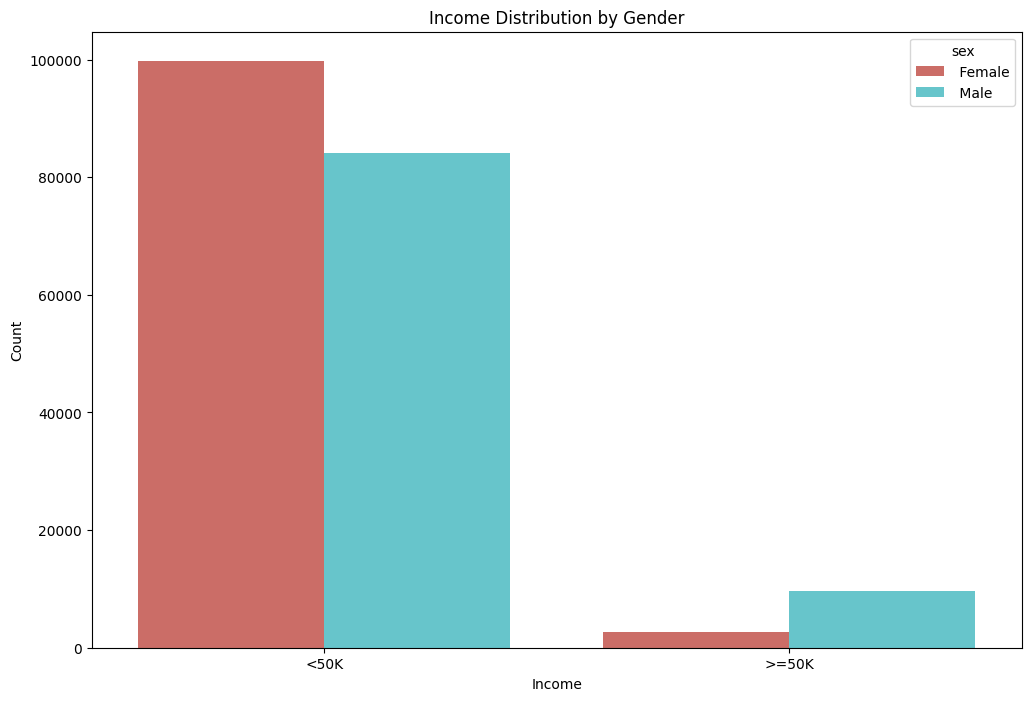

In [39]:
# Set the palette
palette = 'hls'

# Visualization 1: Bar plot with hue for gender
plt.figure(figsize=(12, 8))
sns.countplot(x='income', hue='sex', data=train_renamed, palette=palette)
plt.title('Income Distribution by Gender')
plt.xlabel('Income')
plt.ylabel('Count')
plt.xticks([0, 1], ['<50K', '>=50K'])
plt.show()

Plot 1: Income Distribution by Gender

This plot displays the distribution of income by gender. It shows that a significantly higher number of females earn less than $50k compared to males. In contrast, more males earn above $50k than females.

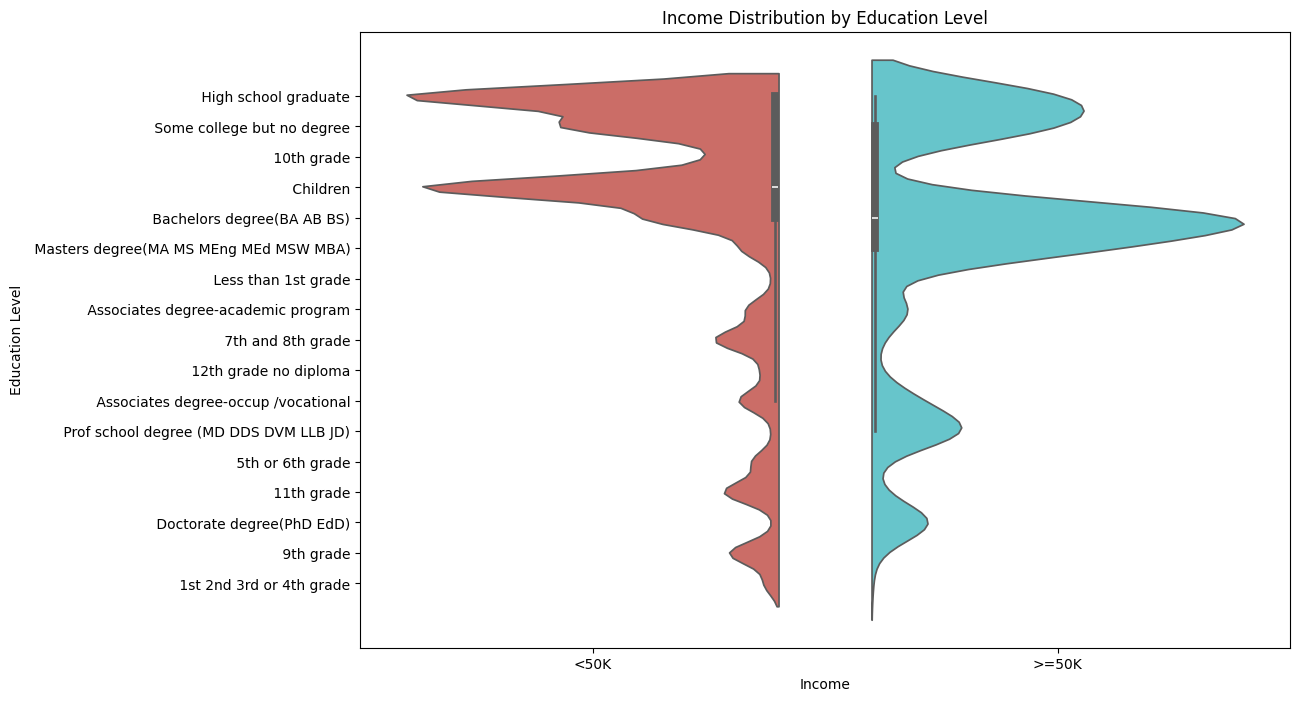

In [40]:
# Visualization 2: Violin plot with hue for education level
plt.figure(figsize=(12, 8))
sns.violinplot(x='income', y='education', hue='income', data=train_renamed, palette=palette, split=True)
plt.title('Income Distribution by Education Level')
plt.xlabel('Income')
plt.ylabel('Education Level')
plt.xticks([0, 1], ['<50K', '>=50K'])
plt.show()

Plot 2: Income Distribution by Education Level (Dual Histogram)

This histogram indicates the income distribution across different education levels. It appears that individuals with higher education levels, particularly those with master's and professional degrees, have a greater number of persons earning above $50k. Conversely, those with less than a high school education predominantly earn below $50k.


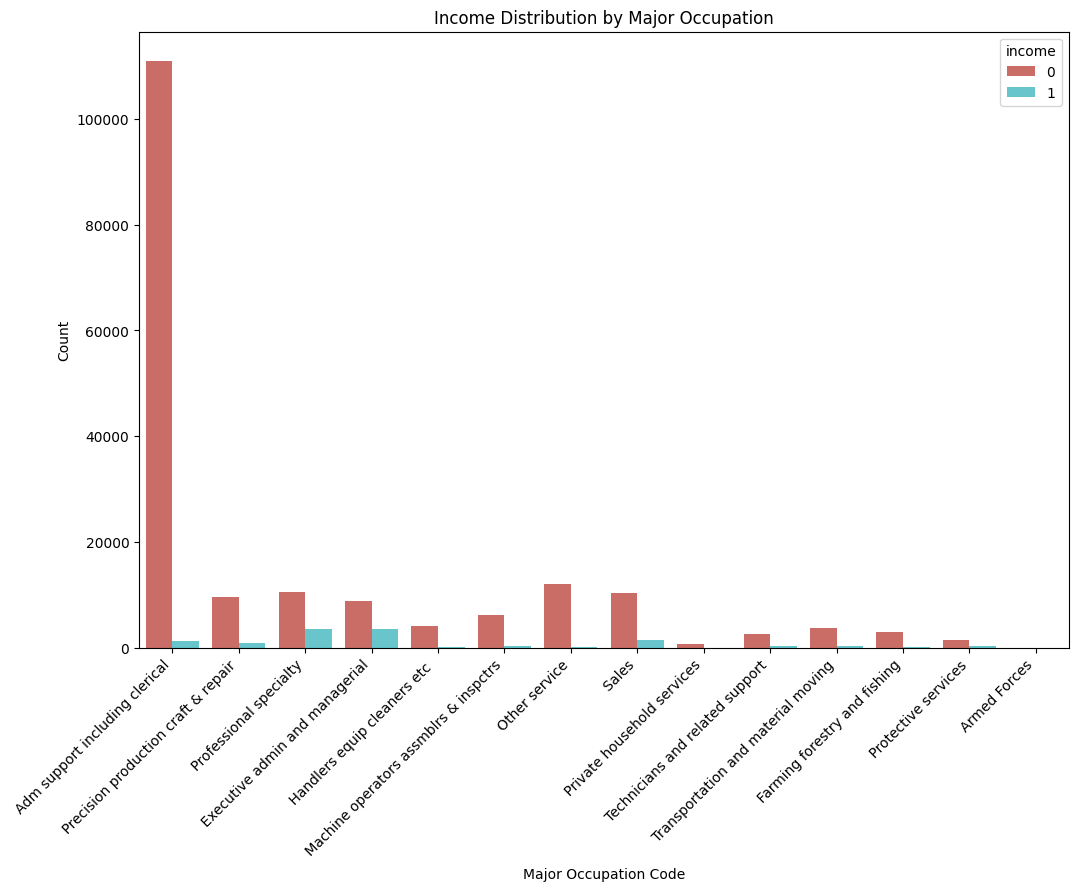

In [41]:
# Visualization 3: Count plot with hue for major occupation code
plt.figure(figsize=(12, 8))
sns.countplot(x='major_occupation_code', hue='income', data=train_renamed, palette=palette)
plt.title('Income Distribution by Major Occupation')
plt.xlabel('Major Occupation Code')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

Plot 3: Income Distribution by Major Occupation

This bar chart categorizes income based on major occupation codes. Individuals in executive, managerial, and professional specialty occupations tend to have a higher count of earners above $50k compared to other occupations.

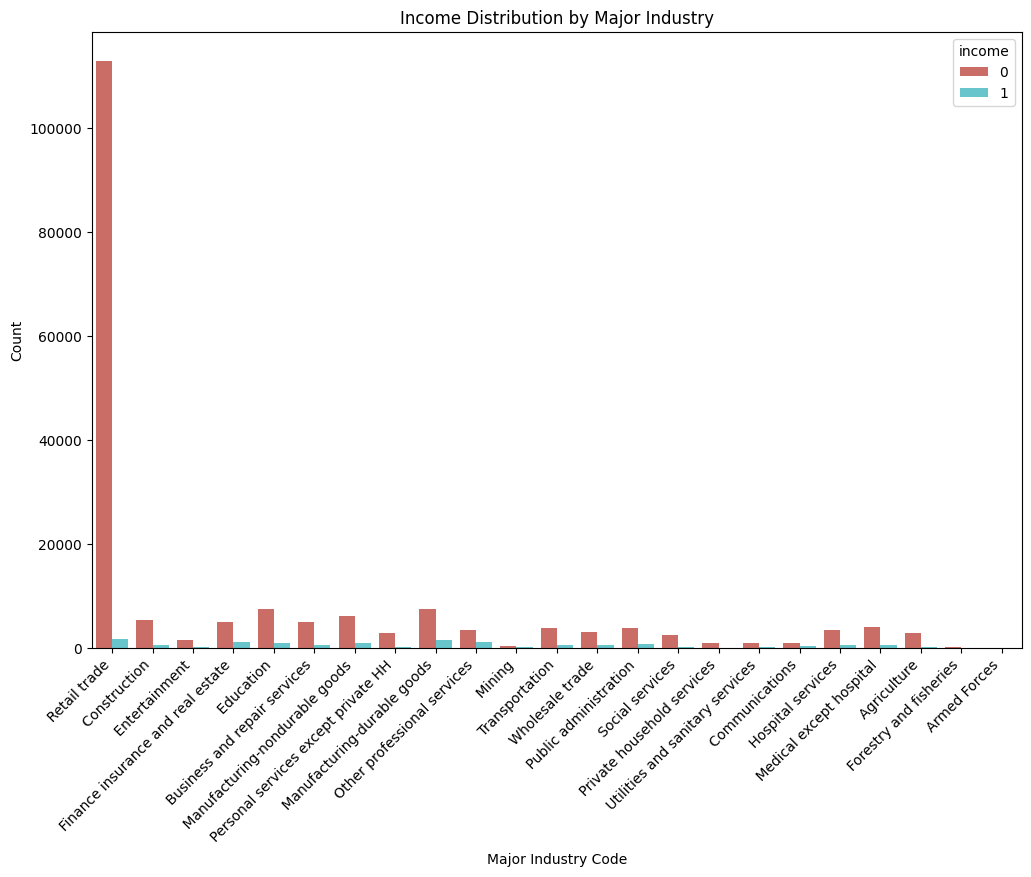

In [42]:
# Visualization 4: Count plot with hue for major industry code
plt.figure(figsize=(12, 8))
sns.countplot(x='major_industry_code', hue='income', data=train_renamed, palette=palette)
plt.title('Income Distribution by Major Industry')
plt.xlabel('Major Industry Code')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

Plot 4: Income Distribution by Major Industry

This plot breaks down income distribution across various industries. Similar to the occupation distribution, industries like professional services and finance have higher counts of individuals earning more than $50k.

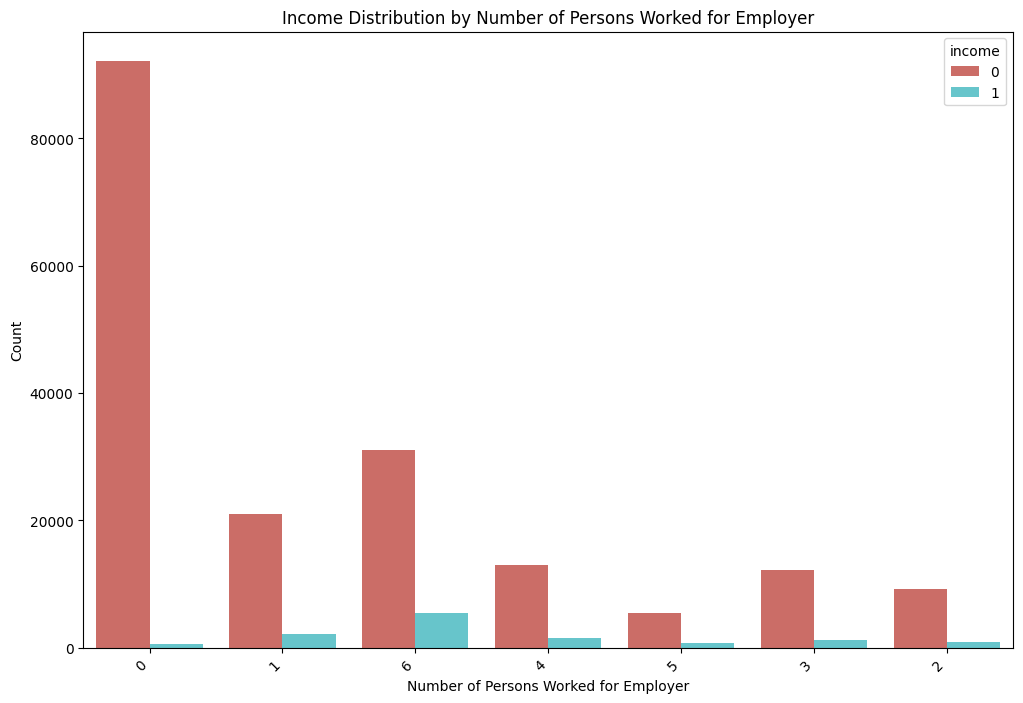

In [43]:
# Visualization 5: Count plot with hue for num persons worked for employer
plt.figure(figsize=(12, 8))
sns.countplot(x='num_persons_worked_for_employer', hue='income', data=train_renamed, palette=palette)
plt.title('Income Distribution by Number of Persons Worked for Employer')
plt.xlabel('Number of Persons Worked for Employer')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

Plot 5: Income Distribution by Number of Persons Worked for Employer

This plot illustrates the distribution of income based on how many different employers individuals have worked for. It shows a general trend that individuals who have worked for more employers are more likely to earn above $50k, though the majority earn below $50k.

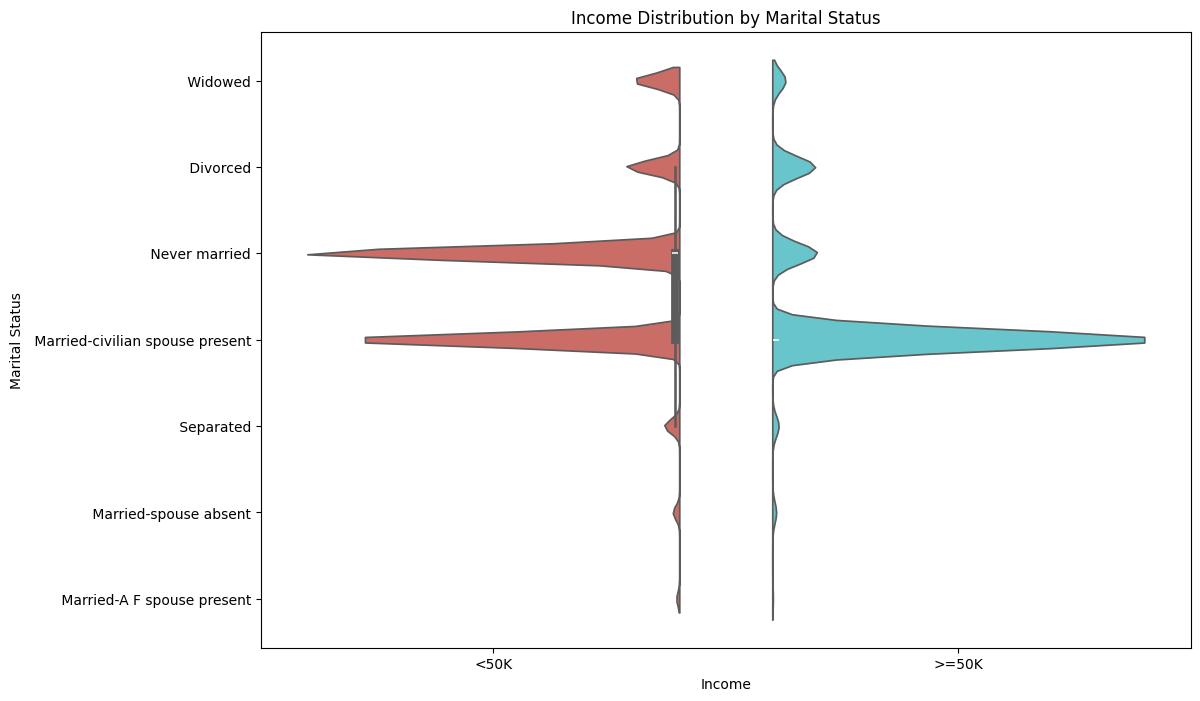

In [44]:
# Visualization 6: Violin plot with hue for marital status
plt.figure(figsize=(12, 8))
sns.violinplot(x='income', y='marital_stat', hue='income', data=train_renamed, palette=palette, split=True)
plt.title('Income Distribution by Marital Status')
plt.xlabel('Income')
plt.ylabel('Marital Status')
plt.xticks([0, 1], ['<50K', '>=50K'])
plt.show()

Plot 6: Income Distribution by Marital Status

A detailed view of income distribution by marital status using a dual histogram format. It shows that married individuals, both with civilian and armed forces spouses present, have a higher proportion earning above $50k, while never-married and divorced individuals predominantly earn below $50k.

### Now lets look at our columns to see how I can improve | change categorical variables 

In [46]:
train_renamed.head()

,age,class_of_worker,detailed_industry_recode,detailed_occupation_recode,education,wage_per_hour,marital_stat,major_industry_code,major_occupation_code,race,hispanic_origin,sex,full_or_part_time_employment_stat,capital_gains,capital_losses,dividends_from_stocks,federal_income_tax_liability,state_of_previous_residence,detailed_household_and_family_stat,detailed_household_summary_in_household,migration_code_change_in_msa,migration_code_change_in_reg,migration_code_move_within_reg,live_in_this_house_1_year_ago,num_persons_worked_for_employer,country_of_birth_father,country_of_birth_mother,country_of_birth_self,citizenship,own_business_or_self_employed,veterans_benefits,weeks_worked_in_year,year,income
0,73,Private,0,0,High school graduate,0,Widowed,Retail trade,Adm support including clerical,White,All other,Female,Not in labor force,0,0,0,Nonfiler,Other Rel 18+ ever marr not in subfamily,Other relative of householder,1700.09,Nonmover,Nonmover,Nonmover,Yes,0,United-States,United-States,United-States,Native- Born in the United States,0,2,0,95,0
1,58,Self-employed-not incorporated,4,34,Some college but no degree,0,Divorced,Construction,Precision production craft & repair,White,All other,Male,Children or Armed Forces,0,0,0,Head of household,Householder,Householder,1053.55,MSA to MSA,Same county,Same county,No,1,United-States,United-States,United-States,Native- Born in the United States,0,2,52,94,0
2,18,Private,0,0,10th grade,0,Never married,Retail trade,Adm support including clerical,Asian or Pacific Islander,All other,Female,Not in labor force,0,0,0,Nonfiler,Child 18+ never marr Not in a subfamily,Child 18 or older,991.95,Nonmover,Nonmover,Nonmover,Yes,0,Vietnam,Vietnam,Vietnam,Foreign born- Not a citizen of U S,0,2,0,95,0
3,9,Private,0,0,Children,0,Never married,Retail trade,Adm support including clerical,White,All other,Female,Children or Armed Forces,0,0,0,Nonfiler,Child <18 never marr not in subfamily,Child under 18 never married,1758.14,Nonmover,Nonmover,Nonmover,Yes,0,United-States,United-States,United-States,Native- Born in the United States,0,0,0,94,0
4,10,Private,0,0,Children,0,Never married,Retail trade,Adm support including clerical,White,All other,Female,Children or Armed Forces,0,0,0,Nonfiler,Child <18 never marr not in subfamily,Child under 18 never married,1069.16,Nonmover,Nonmover,Nonmover,Yes,0,United-States,United-States,United-States,Native- Born in the United States,0,0,0,94,0


In [47]:
train_renamed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 196294 entries, 0 to 199522
Data columns (total 34 columns):
 #   Column                                   Non-Null Count   Dtype   
---  ------                                   --------------   -----   
 0   age                                      196294 non-null  object  
 1   class_of_worker                          196294 non-null  object  
 2   detailed_industry_recode                 196294 non-null  category
 3   detailed_occupation_recode               196294 non-null  category
 4   education                                196294 non-null  object  
 5   wage_per_hour                            196294 non-null  object  
 6   marital_stat                             196294 non-null  object  
 7   major_industry_code                      196294 non-null  object  
 8   major_occupation_code                    196294 non-null  object  
 9   race                                     196294 non-null  object  
 10  hispanic_origin          

# Feature Engineering

In [48]:
train_renamed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 196294 entries, 0 to 199522
Data columns (total 34 columns):
 #   Column                                   Non-Null Count   Dtype   
---  ------                                   --------------   -----   
 0   age                                      196294 non-null  object  
 1   class_of_worker                          196294 non-null  object  
 2   detailed_industry_recode                 196294 non-null  category
 3   detailed_occupation_recode               196294 non-null  category
 4   education                                196294 non-null  object  
 5   wage_per_hour                            196294 non-null  object  
 6   marital_stat                             196294 non-null  object  
 7   major_industry_code                      196294 non-null  object  
 8   major_occupation_code                    196294 non-null  object  
 9   race                                     196294 non-null  object  
 10  hispanic_origin          

In [49]:
train_renamed.to_csv('new_train_dataset', index=None)
test_renamed.to_csv('new_test_dataset', index=None)

In [50]:
df_train = pd.read_csv('./new_train_dataset')
df_test = pd.read_csv("./new_test_dataset")
#df.head()

### Feature Engineering for Train Data

In [51]:
# Exclude categorical variables
numerical_data = df_train.select_dtypes(include=[np.number])  # Only include numerical columns


 
# Calculate the correlation matrix for numerical data only
correlation_matrix = numerical_data.corr()


# Identify highly correlated features
high_corr_features = set()
corr_threshold = 0.51  # Define the threshold

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > corr_threshold:
            colname = correlation_matrix.columns[i]
            high_corr_features.add(colname)

# Print highly correlated features
print("Highly correlated features:", high_corr_features)


# Remove highly correlated features
deleted_features = list(high_corr_features)
df_train.drop(labels=deleted_features, axis=1, inplace=True)
print()
print("Features deleted:", deleted_features)

Highly correlated features: {'num_persons_worked_for_employer', 'weeks_worked_in_year', 'veterans_benefits', 'detailed_occupation_recode'}

Features deleted: ['num_persons_worked_for_employer', 'weeks_worked_in_year', 'veterans_benefits', 'detailed_occupation_recode']


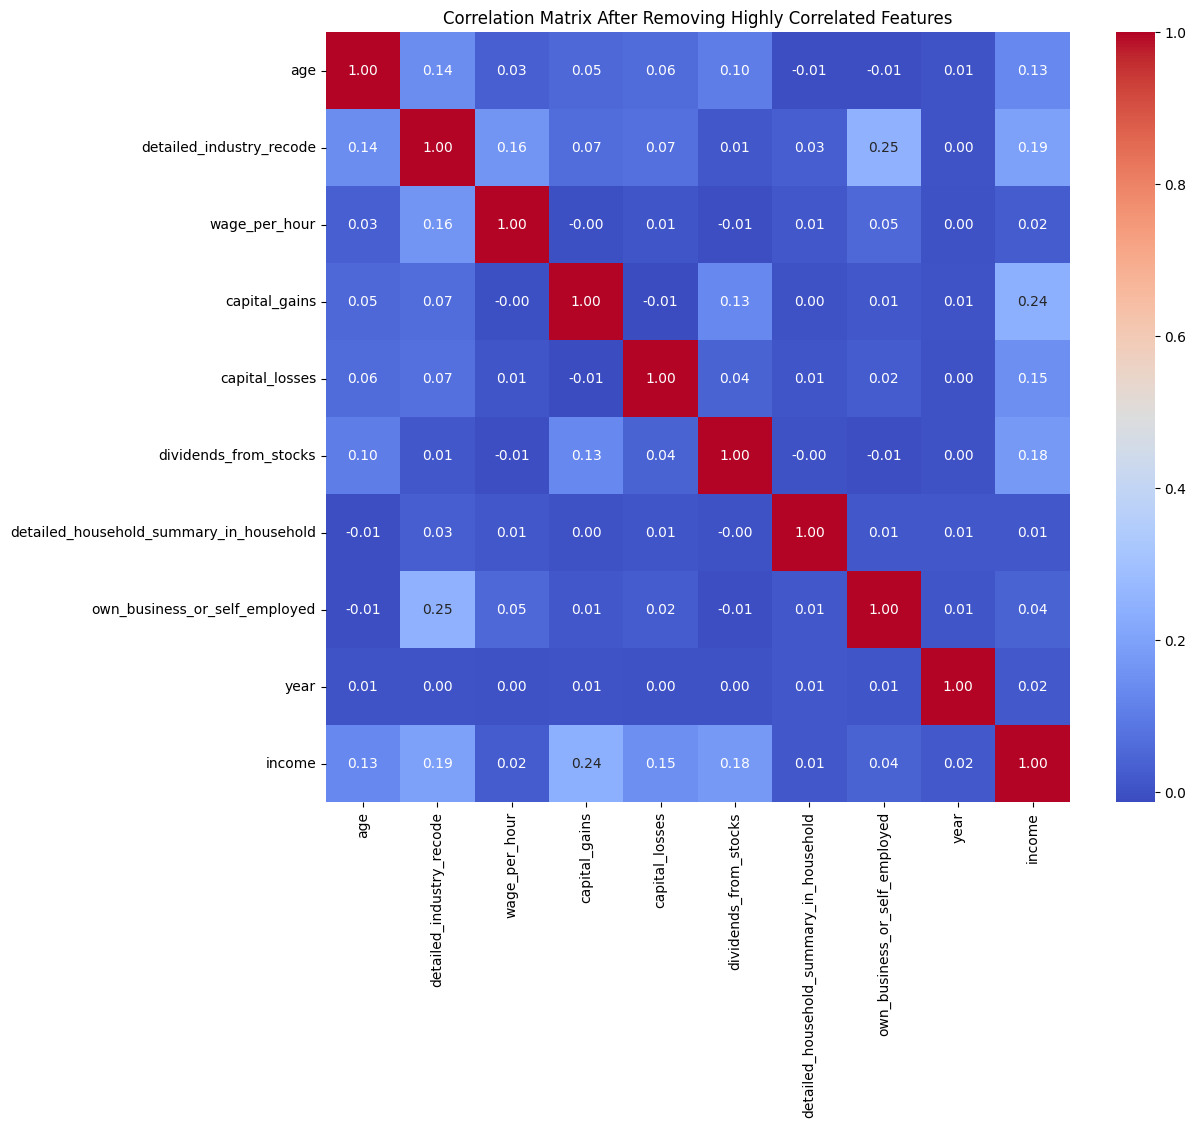

In [52]:
# Visualize the new correlation matrix of the numerical data only
plt.figure(figsize=(12, 10))
sns.heatmap(df_train.select_dtypes(include=[np.number]).corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix After Removing Highly Correlated Features')
plt.show()

In [53]:
cat_col = df_train.select_dtypes(include=['object']).columns.to_list()
df_train[cat_col]

,class_of_worker,education,marital_stat,major_industry_code,major_occupation_code,race,hispanic_origin,sex,full_or_part_time_employment_stat,federal_income_tax_liability,state_of_previous_residence,detailed_household_and_family_stat,migration_code_change_in_msa,migration_code_change_in_reg,migration_code_move_within_reg,live_in_this_house_1_year_ago,country_of_birth_father,country_of_birth_mother,country_of_birth_self,citizenship
0,Private,High school graduate,Widowed,Retail trade,Adm support including clerical,White,All other,Female,Not in labor force,Nonfiler,Other Rel 18+ ever marr not in subfamily,Other relative of householder,Nonmover,Nonmover,Nonmover,Yes,United-States,United-States,United-States,Native- Born in the United States
1,Self-employed-not incorporated,Some college but no degree,Divorced,Construction,Precision production craft & repair,White,All other,Male,Children or Armed Forces,Head of household,Householder,Householder,MSA to MSA,Same county,Same county,No,United-States,United-States,United-States,Native- Born in the United States
2,Private,10th grade,Never married,Retail trade,Adm support including clerical,Asian or Pacific Islander,All other,Female,Not in labor force,Nonfiler,Child 18+ never marr Not in a subfamily,Child 18 or older,Nonmover,Nonmover,Nonmover,Yes,Vietnam,Vietnam,Vietnam,Foreign born- Not a citizen of U S
3,Private,Children,Never married,Retail trade,Adm support including clerical,White,All other,Female,Children or Armed Forces,Nonfiler,Child <18 never marr not in subfamily,Child under 18 never married,Nonmover,Nonmover,Nonmover,Yes,United-States,United-States,United-States,Native- Born in the United States
4,Private,Children,Never married,Retail trade,Adm support including clerical,White,All other,Female,Children or Armed Forces,Nonfiler,Child <18 never marr not in subfamily,Child under 18 never married,Nonmover,Nonmover,Nonmover,Yes,United-States,United-States,United-States,Native- Born in the United States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196289,Private,7th and 8th grade,Married-civilian spouse present,Retail trade,Adm support including clerical,White,All other,Male,Not in labor force,Joint both 65+,Householder,Householder,Nonmover,Nonmover,Nonmover,Yes,Canada,United-States,United-States,Native- Born in the United States
196290,Self-employed-incorporated,11th grade,Married-civilian spouse present,Business and repair services,Executive admin and managerial,White,All other,Male,Children or Armed Forces,Joint one under 65 & one 65+,Householder,Householder,Nonmover,Nonmover,Nonmover,Yes,United-States,United-States,United-States,Native- Born in the United States
196291,Private,Some college but no degree,Married-civilian spouse present,Retail trade,Adm support including clerical,White,All other,Male,Children or Armed Forces,Joint both under 65,Householder,Householder,Nonmover,Nonmover,Nonmover,Yes,Poland,Poland,Germany,Foreign born- U S citizen by naturalization
196292,Private,10th grade,Never married,Retail trade,Adm support including clerical,White,All other,Female,Not in labor force,Nonfiler,Child <18 never marr not in subfamily,Child under 18 never married,Nonmover,Nonmover,Nonmover,Yes,United-States,United-States,United-States,Native- Born in the United States


In [54]:
num_col = df_train.select_dtypes(include=['int64', 'float64']).columns.to_list()
df_train[num_col]

,age,detailed_industry_recode,wage_per_hour,capital_gains,capital_losses,dividends_from_stocks,detailed_household_summary_in_household,own_business_or_self_employed,year,income
0,73,0,0,0,0,0,1700.09,0,95,0
1,58,4,0,0,0,0,1053.55,0,94,0
2,18,0,0,0,0,0,991.95,0,95,0
3,9,0,0,0,0,0,1758.14,0,94,0
4,10,0,0,0,0,0,1069.16,0,94,0
...,...,...,...,...,...,...,...,...,...,...
196289,87,0,0,0,0,0,955.27,0,95,0
196290,65,37,0,6418,0,9,687.19,0,94,0
196291,47,0,0,0,0,157,1923.03,0,95,0
196292,16,0,0,0,0,0,4664.87,0,95,0


In [55]:
#  Feature selection 
# Remove less relevant features based on domain knowledge and initial data exploration
df_train.drop(['state_of_previous_residence', 'country_of_birth_father', 'country_of_birth_mother'], axis=1, inplace=True)
df_train.drop(['detailed_industry_recode', 'year'], axis=1, inplace=True)


In [56]:
cat_col_train = df_train.select_dtypes(include=['object']).columns.to_list()
df_train[cat_col_train]

,class_of_worker,education,marital_stat,major_industry_code,major_occupation_code,race,hispanic_origin,sex,full_or_part_time_employment_stat,federal_income_tax_liability,detailed_household_and_family_stat,migration_code_change_in_msa,migration_code_change_in_reg,migration_code_move_within_reg,live_in_this_house_1_year_ago,country_of_birth_self,citizenship
0,Private,High school graduate,Widowed,Retail trade,Adm support including clerical,White,All other,Female,Not in labor force,Nonfiler,Other relative of householder,Nonmover,Nonmover,Nonmover,Yes,United-States,Native- Born in the United States
1,Self-employed-not incorporated,Some college but no degree,Divorced,Construction,Precision production craft & repair,White,All other,Male,Children or Armed Forces,Head of household,Householder,MSA to MSA,Same county,Same county,No,United-States,Native- Born in the United States
2,Private,10th grade,Never married,Retail trade,Adm support including clerical,Asian or Pacific Islander,All other,Female,Not in labor force,Nonfiler,Child 18 or older,Nonmover,Nonmover,Nonmover,Yes,Vietnam,Foreign born- Not a citizen of U S
3,Private,Children,Never married,Retail trade,Adm support including clerical,White,All other,Female,Children or Armed Forces,Nonfiler,Child under 18 never married,Nonmover,Nonmover,Nonmover,Yes,United-States,Native- Born in the United States
4,Private,Children,Never married,Retail trade,Adm support including clerical,White,All other,Female,Children or Armed Forces,Nonfiler,Child under 18 never married,Nonmover,Nonmover,Nonmover,Yes,United-States,Native- Born in the United States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196289,Private,7th and 8th grade,Married-civilian spouse present,Retail trade,Adm support including clerical,White,All other,Male,Not in labor force,Joint both 65+,Householder,Nonmover,Nonmover,Nonmover,Yes,United-States,Native- Born in the United States
196290,Self-employed-incorporated,11th grade,Married-civilian spouse present,Business and repair services,Executive admin and managerial,White,All other,Male,Children or Armed Forces,Joint one under 65 & one 65+,Householder,Nonmover,Nonmover,Nonmover,Yes,United-States,Native- Born in the United States
196291,Private,Some college but no degree,Married-civilian spouse present,Retail trade,Adm support including clerical,White,All other,Male,Children or Armed Forces,Joint both under 65,Householder,Nonmover,Nonmover,Nonmover,Yes,Germany,Foreign born- U S citizen by naturalization
196292,Private,10th grade,Never married,Retail trade,Adm support including clerical,White,All other,Female,Not in labor force,Nonfiler,Child under 18 never married,Nonmover,Nonmover,Nonmover,Yes,United-States,Native- Born in the United States


In [57]:
num_col_train = df_train.select_dtypes(include=['int64', 'float64']).columns.to_list()
df_train[num_col_train]

,age,wage_per_hour,capital_gains,capital_losses,dividends_from_stocks,detailed_household_summary_in_household,own_business_or_self_employed,income
0,73,0,0,0,0,1700.09,0,0
1,58,0,0,0,0,1053.55,0,0
2,18,0,0,0,0,991.95,0,0
3,9,0,0,0,0,1758.14,0,0
4,10,0,0,0,0,1069.16,0,0
...,...,...,...,...,...,...,...,...
196289,87,0,0,0,0,955.27,0,0
196290,65,0,6418,0,9,687.19,0,0
196291,47,0,0,0,157,1923.03,0,0
196292,16,0,0,0,0,4664.87,0,0


In [58]:
df_train.head()

,age,class_of_worker,education,wage_per_hour,marital_stat,major_industry_code,major_occupation_code,race,hispanic_origin,sex,full_or_part_time_employment_stat,capital_gains,capital_losses,dividends_from_stocks,federal_income_tax_liability,detailed_household_and_family_stat,detailed_household_summary_in_household,migration_code_change_in_msa,migration_code_change_in_reg,migration_code_move_within_reg,live_in_this_house_1_year_ago,country_of_birth_self,citizenship,own_business_or_self_employed,income
0,73,Private,High school graduate,0,Widowed,Retail trade,Adm support including clerical,White,All other,Female,Not in labor force,0,0,0,Nonfiler,Other relative of householder,1700.09,Nonmover,Nonmover,Nonmover,Yes,United-States,Native- Born in the United States,0,0
1,58,Self-employed-not incorporated,Some college but no degree,0,Divorced,Construction,Precision production craft & repair,White,All other,Male,Children or Armed Forces,0,0,0,Head of household,Householder,1053.55,MSA to MSA,Same county,Same county,No,United-States,Native- Born in the United States,0,0
2,18,Private,10th grade,0,Never married,Retail trade,Adm support including clerical,Asian or Pacific Islander,All other,Female,Not in labor force,0,0,0,Nonfiler,Child 18 or older,991.95,Nonmover,Nonmover,Nonmover,Yes,Vietnam,Foreign born- Not a citizen of U S,0,0
3,9,Private,Children,0,Never married,Retail trade,Adm support including clerical,White,All other,Female,Children or Armed Forces,0,0,0,Nonfiler,Child under 18 never married,1758.14,Nonmover,Nonmover,Nonmover,Yes,United-States,Native- Born in the United States,0,0
4,10,Private,Children,0,Never married,Retail trade,Adm support including clerical,White,All other,Female,Children or Armed Forces,0,0,0,Nonfiler,Child under 18 never married,1069.16,Nonmover,Nonmover,Nonmover,Yes,United-States,Native- Born in the United States,0,0


In [59]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196294 entries, 0 to 196293
Data columns (total 25 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   age                                      196294 non-null  int64  
 1   class_of_worker                          196294 non-null  object 
 2   education                                196294 non-null  object 
 3   wage_per_hour                            196294 non-null  int64  
 4   marital_stat                             196294 non-null  object 
 5   major_industry_code                      196294 non-null  object 
 6   major_occupation_code                    196294 non-null  object 
 7   race                                     196294 non-null  object 
 8   hispanic_origin                          196294 non-null  object 
 9   sex                                      196294 non-null  object 
 10  full_or_part_time_employment_sta

### Feature Engineering in Test Dataset 

In [60]:
# Exclude categorical variables
numerical_data = df_test.select_dtypes(include=[np.number])  # Only include numerical columns


 
# Calculate the correlation matrix for numerical data only
correlation_matrix = numerical_data.corr()


# Identify highly correlated features
high_corr_features = set()
corr_threshold = 0.51  # Define the threshold

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > corr_threshold:
            colname = correlation_matrix.columns[i]
            high_corr_features.add(colname)

# Print highly correlated features
print("Highly correlated features:", high_corr_features)


# Remove highly correlated features
deleted_features = list(high_corr_features)
df_test.drop(labels=deleted_features, axis=1, inplace=True)
print()
print("Features deleted:", deleted_features)

Highly correlated features: {'num_persons_worked_for_employer', 'weeks_worked_in_year', 'veterans_benefits', 'detailed_occupation_recode'}

Features deleted: ['num_persons_worked_for_employer', 'weeks_worked_in_year', 'veterans_benefits', 'detailed_occupation_recode']


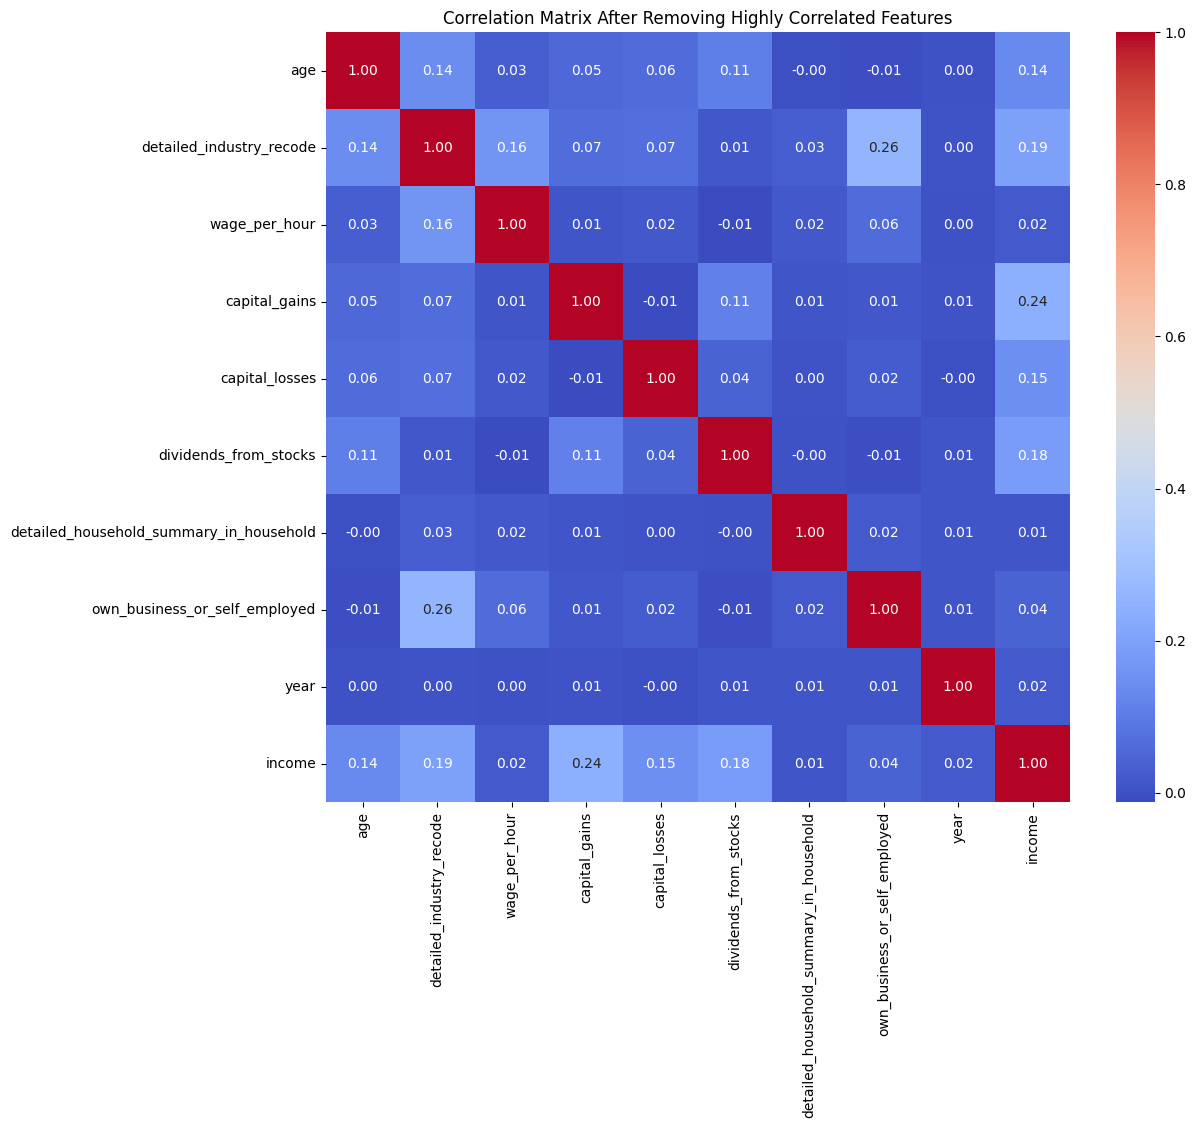

In [61]:
# Visualize the new correlation matrix of the numerical data only
plt.figure(figsize=(12, 10))
sns.heatmap(df_test.select_dtypes(include=[np.number]).corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix After Removing Highly Correlated Features')
plt.show()

In [62]:
cat_col_test = df_test.select_dtypes(include=['object']).columns.to_list()
df_test[cat_col_test]

,class_of_worker,education,marital_stat,major_industry_code,major_occupation_code,race,hispanic_origin,sex,full_or_part_time_employment_stat,federal_income_tax_liability,state_of_previous_residence,detailed_household_and_family_stat,migration_code_change_in_msa,migration_code_change_in_reg,migration_code_move_within_reg,live_in_this_house_1_year_ago,country_of_birth_father,country_of_birth_mother,country_of_birth_self,citizenship
0,Private,1st 2nd 3rd or 4th grade,Married-civilian spouse present,Manufacturing-durable goods,Machine operators assmblrs & inspctrs,White,Mexican (Mexicano),Female,Full-time schedules,Joint one under 65 & one 65+,Spouse of householder,Spouse of householder,Nonmover,Nonmover,Nonmover,Yes,Mexico,Mexico,Mexico,Foreign born- Not a citizen of U S
1,Self-employed-not incorporated,Associates degree-occup /vocational,Married-civilian spouse present,Business and repair services,Professional specialty,White,All other,Female,PT for econ reasons usually PT,Joint both under 65,Spouse of householder,Spouse of householder,Nonmover,Nonmover,Nonmover,Yes,United-States,United-States,United-States,Native- Born in the United States
2,Private,Children,Never married,Retail trade,Adm support including clerical,White,Mexican-American,Male,Children or Armed Forces,Nonfiler,Child <18 never marr not in subfamily,Child under 18 never married,Nonmover,Nonmover,Nonmover,Yes,United-States,United-States,United-States,Native- Born in the United States
3,Private,High school graduate,Divorced,Transportation,Executive admin and managerial,White,All other,Female,Children or Armed Forces,Head of household,Householder,Householder,Nonmover,Nonmover,Nonmover,Yes,United-States,United-States,United-States,Native- Born in the United States
4,Private,High school graduate,Divorced,Construction,Precision production craft & repair,White,All other,Male,Full-time schedules,Single,Secondary individual,Nonrelative of householder,Nonmover,Nonmover,Nonmover,Yes,United-States,United-States,United-States,Native- Born in the United States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98874,Private,Children,Never married,Retail trade,Adm support including clerical,White,Mexican-American,Male,Children or Armed Forces,Nonfiler,Child <18 never marr not in subfamily,Child under 18 never married,Nonmover,Nonmover,Nonmover,Yes,United-States,United-States,United-States,Native- Born in the United States
98875,Private,11th grade,Separated,Manufacturing-durable goods,Machine operators assmblrs & inspctrs,Black,All other,Male,Full-time schedules,Single,Nonfamily householder,Householder,Nonmover,Nonmover,Nonmover,Yes,United-States,United-States,United-States,Native- Born in the United States
98876,Self-employed-not incorporated,7th and 8th grade,Married-civilian spouse present,Agriculture,Farming forestry and fishing,White,Mexican (Mexicano),Male,Children or Armed Forces,Joint both under 65,Spouse of RP of unrelated subfamily,Nonrelative of householder,Nonmover,Nonmover,Nonmover,Yes,Mexico,Mexico,Mexico,Foreign born- U S citizen by naturalization
98877,Private,Bachelors degree(BA AB BS),Married-civilian spouse present,Other professional services,Executive admin and managerial,White,All other,Female,Full-time schedules,Joint both under 65,Spouse of householder,Spouse of householder,Nonmover,Nonmover,Nonmover,Yes,United-States,United-States,United-States,Native- Born in the United States


In [63]:
num_col_test = df_test.select_dtypes(include=['int64', 'float64']).columns.to_list()
df_test[num_col_test]

,age,detailed_industry_recode,wage_per_hour,capital_gains,capital_losses,dividends_from_stocks,detailed_household_summary_in_household,own_business_or_self_employed,year,income
0,38,6,0,0,0,0,1032.38,0,95,0
1,44,37,0,0,0,2500,1462.33,0,95,0
2,2,0,0,0,0,0,1601.75,0,95,0
3,35,29,0,0,0,0,1866.88,2,94,0
4,49,4,0,0,0,0,1394.54,0,95,0
...,...,...,...,...,...,...,...,...,...,...
98874,4,0,0,0,0,0,1335.91,0,95,0
98875,61,8,0,0,0,0,2511.11,0,95,0
98876,24,1,0,0,0,0,2083.76,0,94,0
98877,30,45,0,0,0,0,1680.06,0,95,0


# Feature Selection 

In [64]:
# I remove less relevant features based on domain knowledge and initial data exploration
df_test.drop(['state_of_previous_residence', 'country_of_birth_father', 'country_of_birth_mother'], axis=1, inplace=True)
df_test.drop(['detailed_industry_recode', 'year'], axis=1, inplace=True)

In [65]:
df_test.head()

,age,class_of_worker,education,wage_per_hour,marital_stat,major_industry_code,major_occupation_code,race,hispanic_origin,sex,full_or_part_time_employment_stat,capital_gains,capital_losses,dividends_from_stocks,federal_income_tax_liability,detailed_household_and_family_stat,detailed_household_summary_in_household,migration_code_change_in_msa,migration_code_change_in_reg,migration_code_move_within_reg,live_in_this_house_1_year_ago,country_of_birth_self,citizenship,own_business_or_self_employed,income
0,38,Private,1st 2nd 3rd or 4th grade,0,Married-civilian spouse present,Manufacturing-durable goods,Machine operators assmblrs & inspctrs,White,Mexican (Mexicano),Female,Full-time schedules,0,0,0,Joint one under 65 & one 65+,Spouse of householder,1032.38,Nonmover,Nonmover,Nonmover,Yes,Mexico,Foreign born- Not a citizen of U S,0,0
1,44,Self-employed-not incorporated,Associates degree-occup /vocational,0,Married-civilian spouse present,Business and repair services,Professional specialty,White,All other,Female,PT for econ reasons usually PT,0,0,2500,Joint both under 65,Spouse of householder,1462.33,Nonmover,Nonmover,Nonmover,Yes,United-States,Native- Born in the United States,0,0
2,2,Private,Children,0,Never married,Retail trade,Adm support including clerical,White,Mexican-American,Male,Children or Armed Forces,0,0,0,Nonfiler,Child under 18 never married,1601.75,Nonmover,Nonmover,Nonmover,Yes,United-States,Native- Born in the United States,0,0
3,35,Private,High school graduate,0,Divorced,Transportation,Executive admin and managerial,White,All other,Female,Children or Armed Forces,0,0,0,Head of household,Householder,1866.88,Nonmover,Nonmover,Nonmover,Yes,United-States,Native- Born in the United States,2,0
4,49,Private,High school graduate,0,Divorced,Construction,Precision production craft & repair,White,All other,Male,Full-time schedules,0,0,0,Single,Nonrelative of householder,1394.54,Nonmover,Nonmover,Nonmover,Yes,United-States,Native- Born in the United States,0,0


In [66]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98879 entries, 0 to 98878
Data columns (total 25 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   age                                      98879 non-null  int64  
 1   class_of_worker                          98879 non-null  object 
 2   education                                98879 non-null  object 
 3   wage_per_hour                            98879 non-null  int64  
 4   marital_stat                             98879 non-null  object 
 5   major_industry_code                      98879 non-null  object 
 6   major_occupation_code                    98879 non-null  object 
 7   race                                     98879 non-null  object 
 8   hispanic_origin                          98879 non-null  object 
 9   sex                                      98879 non-null  object 
 10  full_or_part_time_employment_stat        98879

In [67]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196294 entries, 0 to 196293
Data columns (total 25 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   age                                      196294 non-null  int64  
 1   class_of_worker                          196294 non-null  object 
 2   education                                196294 non-null  object 
 3   wage_per_hour                            196294 non-null  int64  
 4   marital_stat                             196294 non-null  object 
 5   major_industry_code                      196294 non-null  object 
 6   major_occupation_code                    196294 non-null  object 
 7   race                                     196294 non-null  object 
 8   hispanic_origin                          196294 non-null  object 
 9   sex                                      196294 non-null  object 
 10  full_or_part_time_employment_sta

In [68]:
df_train.columns

Index(['age', 'class_of_worker', 'education', 'wage_per_hour', 'marital_stat',
       'major_industry_code', 'major_occupation_code', 'race',
       'hispanic_origin', 'sex', 'full_or_part_time_employment_stat',
       'capital_gains', 'capital_losses', 'dividends_from_stocks',
       'federal_income_tax_liability', 'detailed_household_and_family_stat',
       'detailed_household_summary_in_household',
       'migration_code_change_in_msa', 'migration_code_change_in_reg',
       'migration_code_move_within_reg', 'live_in_this_house_1_year_ago',
       'country_of_birth_self', 'citizenship', 'own_business_or_self_employed',
       'income'],
      dtype='object')

In [69]:
df_test.columns

Index(['age', 'class_of_worker', 'education', 'wage_per_hour', 'marital_stat',
       'major_industry_code', 'major_occupation_code', 'race',
       'hispanic_origin', 'sex', 'full_or_part_time_employment_stat',
       'capital_gains', 'capital_losses', 'dividends_from_stocks',
       'federal_income_tax_liability', 'detailed_household_and_family_stat',
       'detailed_household_summary_in_household',
       'migration_code_change_in_msa', 'migration_code_change_in_reg',
       'migration_code_move_within_reg', 'live_in_this_house_1_year_ago',
       'country_of_birth_self', 'citizenship', 'own_business_or_self_employed',
       'income'],
      dtype='object')

# Preprocess Data & Data Modelling for Random Forest

Accuracy: 0.9519513749127722
AUC Score: 0.9316218035354508
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97     92693
           1       0.71      0.39      0.51      6186

    accuracy                           0.95     98879
   macro avg       0.84      0.69      0.74     98879
weighted avg       0.94      0.95      0.95     98879



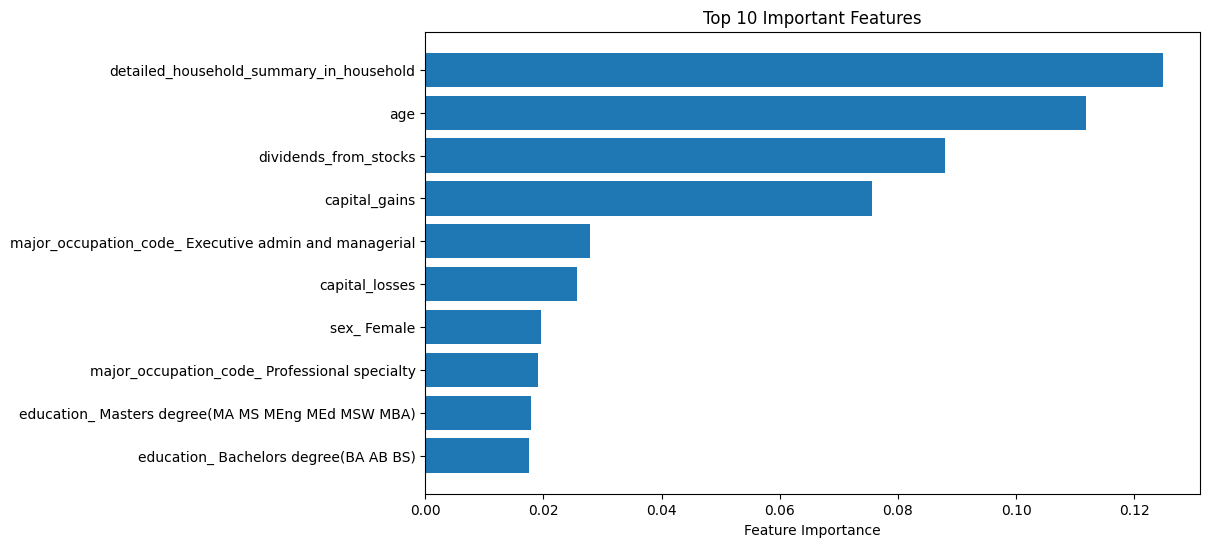

In [70]:
""" 
Here's a summary of what the code does:
1.	Data Preprocessing: It defines categorical and numerical features based on the training data and sets up a ColumnTransformer (preprocessor)
to scale numerical features and one-hot encode categorical features. This ensures that the data is properly prepared for training.
2.	Model Training: It sets up a pipeline (pipeline) that includes the preprocessing step followed by a Machine Learning Model.
3.	Model Evaluation: It splits the data into training and test sets, trains the model on the training data, and evaluates its performance on
 the test data using metrics such as accuracy, AUC score, and classification report.
4.	Feature Importance: It calculates and visualizes the feature importances of the trained Random Forest model.
"""


# Define categorical and numerical features based on the training data
categorical_features = [col for col in df_train.columns if df_train[col].dtype == 'object']
numerical_features = [col for col in df_train.columns if df_train[col].dtype in ['int64', 'float64'] and col != 'income']

# Create a ColumnTransformer to handle preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ],
    remainder='passthrough'  # Pass through other columns not specified
)

# Setup pipeline with preprocessing and classifier
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Split the training data into train and validation
X_train, y_train = df_train.drop('income', axis=1), df_train['income']
X_test, y_test = df_test.drop('income', axis=1), df_test['income']

# Train the model
pipeline.fit(X_train, y_train)

# Predictions for validation
y_pred = pipeline.predict(X_test)
y_proba = pipeline.predict_proba(X_test)[:, 1]

# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_proba)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"AUC Score: {auc_score}")
print("Classification Report:")
print(report)

# Feature importance
feature_names = numerical_features + \
    list(pipeline.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(categorical_features))
importances = pipeline.named_steps['classifier'].feature_importances_

# Map features to their importances
feature_importance = sorted(zip(feature_names, importances), key=lambda x: x[1], reverse=True)

# Plot top 10 features
plt.figure(figsize=(10, 6))
top_features = feature_importance[:10]
features, scores = zip(*top_features)
plt.barh(features, scores)
plt.xlabel('Feature Importance')
plt.title('Top 10 Important Features')
plt.gca().invert_yaxis()
plt.show()


### Model-Specific Metrics Summary: Random Forest

•	Accuracy: 95.19%, high accuracy indicating good overall performance.

•	AUC: 0.9316, excellent ability to distinguish between the classes.

•	Classification Report: Strong performance on the majority class but weaker on the minority class, indicating room for improvement in recall for the "greater than $50k" class.

# Preprocess Data & Data Modelling for Logistic Regression 

Accuracy: 0.9507175436644788
AUC Score: 0.9379320990602951
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97     92693
           1       0.72      0.35      0.47      6186

    accuracy                           0.95     98879
   macro avg       0.84      0.67      0.72     98879
weighted avg       0.94      0.95      0.94     98879



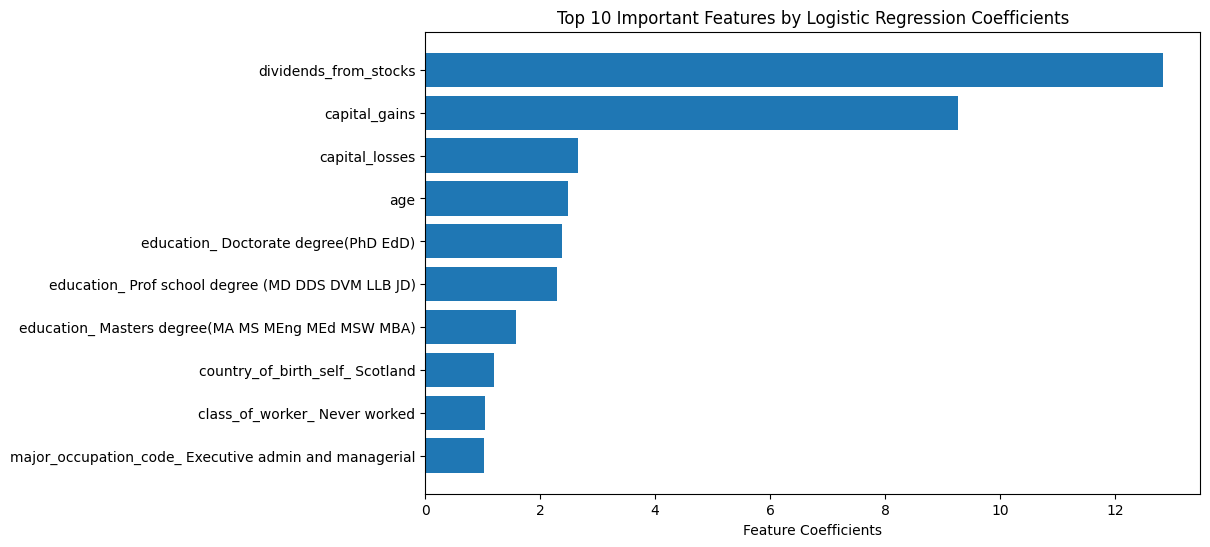

In [71]:
# Define categorical and numerical features based on the training data
categorical_features = [col for col in df_train.columns if df_train[col].dtype == 'object']
numerical_features = [col for col in df_train.columns if df_train[col].dtype in ['int64', 'float64'] and col != 'income']

# Create a ColumnTransformer to handle preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ],
    remainder='passthrough'  # Pass through other columns not specified
)

# Setup pipeline with preprocessing and classifier
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42, max_iter=1000))
])

# Split the training data into train and validation
X_train, y_train = df_train.drop('income', axis=1), df_train['income']
X_test, y_test = df_test.drop('income', axis=1), df_test['income']

# Train the model
pipeline.fit(X_train, y_train)

# Predictions for validation
y_pred = pipeline.predict(X_test)
y_proba = pipeline.predict_proba(X_test)[:, 1]

# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_proba)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"AUC Score: {auc_score}")
print("Classification Report:")
print(report)

# Feature importance - For logistic regression, we look at the coefficients
coefficients = pipeline.named_steps['classifier'].coef_[0]
feature_names = numerical_features + \
    list(pipeline.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(categorical_features))
feature_importance = sorted(zip(feature_names, coefficients), key=lambda x: x[1], reverse=True)

# Plot top 10 features
plt.figure(figsize=(10, 6))
top_features = feature_importance[:10]
features, scores = zip(*top_features)
plt.barh(features, scores)
plt.xlabel('Feature Coefficients')
plt.title('Top 10 Important Features by Logistic Regression Coefficients')
plt.gca().invert_yaxis()
plt.show()

### Model-Specific Metrics Summary: Logistc Regression 

•	Accuracy: 95.07%, similar to Random Forest, showing robust performance.

•	AUC: 0.9379, slightly better than Random Forest, suggesting a strong discriminative ability.

•	Classification Report: Shows a slight disadvantage in recall compared to Random Forest for the higher income class, similar overall performance.

# Preprocess Data & Data Modelling for Decision Tree 

Accuracy: 0.9301975141334358
AUC Score: 0.7157270112158464
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96     92693
           1       0.45      0.47      0.46      6186

    accuracy                           0.93     98879
   macro avg       0.70      0.72      0.71     98879
weighted avg       0.93      0.93      0.93     98879



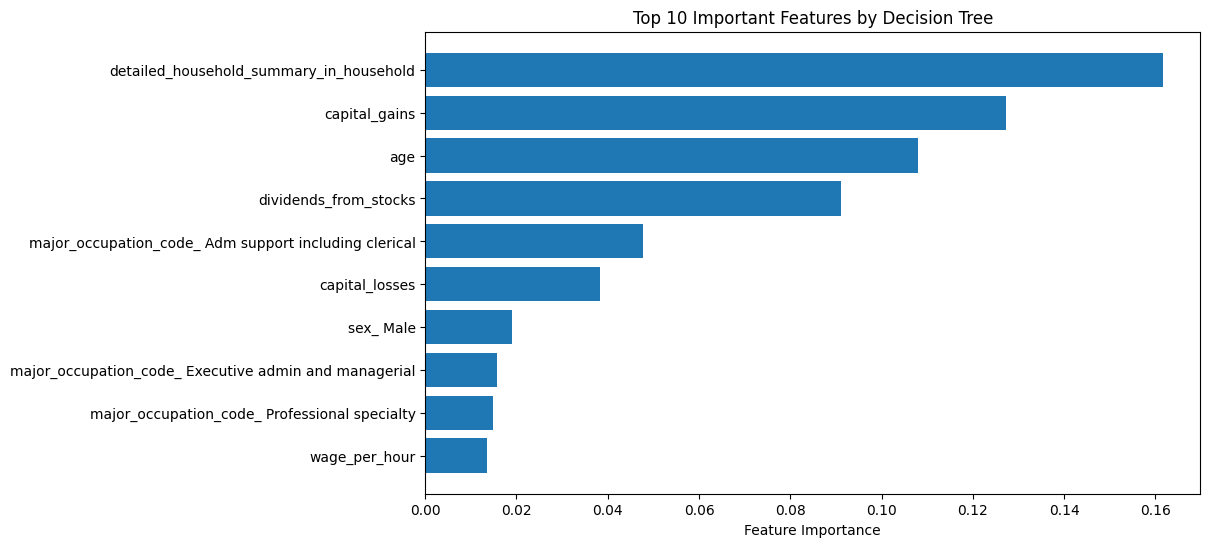

In [72]:
# Define categorical and numerical features based on the training data
categorical_features = [col for col in df_train.columns if df_train[col].dtype == 'object']
numerical_features = [col for col in df_train.columns if df_train[col].dtype in ['int64', 'float64'] and col != 'income']

# Create a ColumnTransformer to handle preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ],
    remainder='passthrough'  # Pass through other columns not specified
)

# Setup pipeline with preprocessing and classifier
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

# Split the training data into train and validation
X_train, y_train = df_train.drop('income', axis=1), df_train['income']
X_test, y_test = df_test.drop('income', axis=1), df_test['income']

# Train the model
pipeline.fit(X_train, y_train)

# Predictions for validation
y_pred = pipeline.predict(X_test)
y_proba = pipeline.predict_proba(X_test)[:, 1]

# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_proba)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"AUC Score: {auc_score}")
print("Classification Report:")
print(report)

# Feature importance
importances = pipeline.named_steps['classifier'].feature_importances_
feature_names = numerical_features + \
    list(pipeline.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(categorical_features))
feature_importance = sorted(zip(feature_names, importances), key=lambda x: x[1], reverse=True)

# Plot top 10 features
plt.figure(figsize=(10, 6))
top_features = feature_importance[:10]
features, scores = zip(*top_features)
plt.barh(features, scores)
plt.xlabel('Feature Importance')
plt.title('Top 10 Important Features by Decision Tree')
plt.gca().invert_yaxis()
plt.show()

### Model-Specific Metrics Summary: Decision Tree

•	Accuracy: 93.02%, lower than the other models, indicating some struggles in correctly classifying instances.

•	AUC: 0.7157, significantly lower, reflecting poorer performance in distinguishing between the classes effectively.

•	Classification Report: Exhibits balanced precision and recall but at a lower level compared to the other models.


# Model Assesment 

### Model Comparison and Interpretation
I've implemented three different models (Random Forest, Logistic Regression, and Decision Tree) to predict whether income exceeds $50k or not, and provided detailed results for each, including feature importance from each model. Let's analyze each model's performance and interpret the feature importance outputs:

### 1. Random Forest

•	Performance: High accuracy (95.19%) and AUC Score (0.9316), indicating strong classification performance, particularly in distinguishing between the two income classes.

•	Classification Report: High precision and recall for the "less than $50k" class. However, for the "greater than $50k" class, although precision is moderately high, recall is quite low (0.39), indicating many false negatives.

•	Feature Importance: Major features include 'detailed_household_summary_in_household', 'age', and 'dividends_from_stocks'. This suggests that household context, age, and investment returns are key determinants in predicting higher income levels.

### 2. Logistic Regression

•	Performance: Similar to Random Forest with slightly higher AUC (0.9379) but slightly lower accuracy (95.07%).

•	Classification Report: Similar trends to Random Forest, with even lower recall for the "greater than $50k" class.

•	Feature Importance: Dominated by financial variables ('dividends_from_stocks', 'capital_gains', 'capital_losses') and education ('education_Doctorate degree'). Logistic regression coefficients indicate the strong influence of these features on the likelihood of having a higher income.

### 3. Decision Tree

•	Performance: Lower accuracy (93.02%) and significantly lower AUC (0.7157) compared to the other models.

•	Classification Report: Similar precision for the "less than $50k" class as the other models but much lower recall and precision for the "greater than $50k" class.

•	Feature Importance: Like Random Forest, it shows a mix of demographic and financial variables. Unique in placing significant importance on 'wage_per_hour', a feature less prominent in the other models.


### Models and Metrics Explained

- Random Forest, Logistic Regression, and Decision Tree were utilized to classify income levels (above or below $50k).

-  Accuracy measures the overall correctness of the model, indicating a high level of correct predictions across the models, especially in Random Forest and Logistic Regression.

-  AUC (Area Under the Curve) assesses the model's ability to discriminate between the classes, with Logistic Regression performing slightly better than Random Forest and significantly better than Decision Tree.

-  Classification Report includes:


• Precision: Proportion of positive identifications that were actually correct.

• Recall (Sensitivity): Proportion of actual positives that were identified correctly.

• F1-Score: Harmonic mean of precision and recall, providing a balance between the two.

### Performance Insights

- Random Forest and Logistic Regression demonstrated high accuracy (around 95%) and strong AUC scores (0.93+), indicating robust performance in distinguishing income levels.

- Decision Tree showed lower accuracy (93%) and AUC (0.72), suggesting difficulties in effectively classifying the higher income bracket and distinguishing between classes.

- Classification reports reveal better precision and recall for the lower income class across all models, but particularly low recall for the higher income class in Decision Tree.





# Results 


# Key Findings on Features

1.	Financial Attributes: Across all three models, financial features like 'dividends_from_stocks', 'capital_gains', and 'capital_losses' are prominently influencing the prediction outcomes. This indicates that financial stability and investment income are strong indicators of higher income levels.

2.	Demographics and Household Context: 'age' and 'detailed_household_summary_in_household' emerge as significant in the Random Forest and Decision Tree models, highlighting the role of age and household composition in income levels.

3.	Occupation and Education:


- Occupation: Features related to occupation ('major_occupation_code_Executive admin and managerial', 'major_occupation_code_Professional specialty') are significant, suggesting that job roles strongly correlate with income categories.


- Education: Higher education levels, particularly professional and doctoral degrees, appear crucial in the Logistic Regression model, underscoring education's impact on income potential.


4.	Gender: In the Decision Tree model, 'sex_Male' is a significant feature, indicating potential differences in income based on gender, a factor less emphasized in the other models.



# Recommendations

1.	Focus on Financial Features: Given their strong influence across all models, enhancing data collection around financial attributes could provide more precise predictions and insights into income levels.

2.	Enhance Data on Education and Occupation: Further detailed categorization or more nuanced data collection around these features could help refine predictions, particularly in Logistic Regression where education plays a significant role.

3.	Model-Specific Recommendations:

o	Random Forest: Continue using this model for its superior performance and consider hyperparameter tuning to further enhance its predictive power, particularly around the number of trees and depth.

o	Logistic Regression: Given its emphasis on coefficients and interpretability, using regularization techniques might help prevent overfitting and improve model generalization.

o	Decision Tree: Increase the depth or adjust the minimum samples split to capture more complex patterns without overfitting.


# Future Improvements

1.	Handling Imbalanced Data: The significant class imbalance noted from the classification reports suggests using techniques like SMOTE, adjusted class weights, or different sampling strategies to ensure the minority class is adequately represented and learned.

2.	Advanced Feature Engineering: Creating interaction features between top features, like combining 'age' with 'education_level', could uncover more complex relationships that impact income levels.

3.	Model Ensembling: Considering ensemble methods like Gradient Boosting or Stacked Generalization could leverage the strengths of individual models to improve overall accuracy and robustness.

4.	Exploratory Data Analysis (EDA): Conduct deeper EDA to understand the distributions and relationships of the most influential features better. This might provide insights into potential biases or anomalies in the dataset.

5.	Regular Updating and Validation: Regularly update the models with new data and validate them to ensure they adapt to changes over time in the factors affecting income levels.


# Conclusion

For the task of classifying income levels, the Random Forest model stands out due to its high accuracy, excellent AUC score, and relatively balanced performance across income classes. However, all models benefit from improvements in feature engineering, handling class imbalance, and continuous tuning and testing to adapt to new data.
